In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mothers qualification,Fathers qualification,Mothers occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("The data has ",df.shape[0],"rows and ",df.shape[1], "columns")


The data has  4424 rows and  35 columns


In [5]:
print("Target variable contains :")
df['Target'].value_counts()

Target variable contains :


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [6]:
# data types
print("Data SET:\n")
display(df.dtypes.sort_index())

Data SET:



Age at enrollment                                   int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Curricular units 1st sem (approved)                 int64
Curricular units 1st sem (credited)                 int64
Curricular units 1st sem (enrolled)                 int64
Curricular units 1st sem (evaluations)              int64
Curricular units 1st sem (grade)                  float64
Curricular units 1st sem (without evaluations)      int64
Curricular units 2nd sem (approved)                 int64
Curricular units 2nd sem (credited)                 int64
Curricular units 2nd sem (enrolled)                 int64
Curricular units 2nd sem (evaluations)              int64
Curricular units 2nd sem (grade)                  float64
Curricular units 2nd sem (without evaluations)      int64
Daytime/evening attendance                          int64
Debtor        

In [7]:
columns_to_convert = ['Marital status','International','Application mode', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Nacionality', 'Mothers qualification', 'Fathers qualification', 'Mothers occupation', 'Fathers occupation', 'Displaced', 'Debtor', 'Educational special needs', 'Tuition fees up to date', 'Gender', 'Scholarship holder']

# Convert selected columns to categorical
df[columns_to_convert] = df[columns_to_convert].astype('object')
df.dtypes

Marital status                                     object
Application mode                                   object
Application order                                   int64
Course                                             object
Daytime/evening attendance                         object
Previous qualification                             object
Nacionality                                        object
Mothers qualification                              object
Fathers qualification                              object
Mothers occupation                                 object
Fathers occupation                                 object
Displaced                                          object
Educational special needs                          object
Debtor                                             object
Tuition fees up to date                            object
Gender                                             object
Scholarship holder                                 object
Age at enrollm

In [8]:
#This shows us that certain categorical features have been given int as their datatype which needs to be corrected.

In [9]:
# missing values
print('NUMBER OF  MISSING VALUES: \n')
display(df.isnull().sum().sort_values(ascending=False))

NUMBER OF  MISSING VALUES: 



Marital status                                    0
Curricular units 2nd sem (enrolled)               0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (grade)                  0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (evaluations)            0
International                                     0
Curricular units 2nd sem (approved)               0
Curricular units 2nd sem (grade)                  0
Curricular units 2nd sem (without evaluations)    0
Unemployment rate                                 0
Inflation rate                                    0
GDP                                               0
Curricular units 1st sem (credited)               0
Age at enrollment                                 0
Application mode                                  0
Fathers qual

In [10]:
# Thus our data does not contain any missing values

In [11]:
#  checking for duplicated rows
df.duplicated(keep=False).sum()

0

In [12]:
# number of unique categories in categorical features
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols].nunique().sort_values(ascending=False)

Fathers occupation            46
Fathers qualification         34
Mothers occupation            32
Mothers qualification         29
Nacionality                   21
Application mode              18
Course                        17
Previous qualification        17
Marital status                 6
Target                         3
Daytime/evening attendance     2
Displaced                      2
Educational special needs      2
Debtor                         2
Tuition fees up to date        2
Gender                         2
Scholarship holder             2
International                  2
dtype: int64

In [13]:
columns = df.select_dtypes(include=['float', int]).columns

for col in columns:
    max_value = df[col].max()
    min_value = df[col].min()
    print(f"For feature {col} range is [{min_value} to {max_value}]")


For feature Application order range is [0 to 9]
For feature Age at enrollment range is [17 to 70]
For feature Curricular units 1st sem (credited) range is [0 to 20]
For feature Curricular units 1st sem (enrolled) range is [0 to 26]
For feature Curricular units 1st sem (evaluations) range is [0 to 45]
For feature Curricular units 1st sem (approved) range is [0 to 26]
For feature Curricular units 1st sem (grade) range is [0.0 to 18.875]
For feature Curricular units 1st sem (without evaluations) range is [0 to 12]
For feature Curricular units 2nd sem (credited) range is [0 to 19]
For feature Curricular units 2nd sem (enrolled) range is [0 to 23]
For feature Curricular units 2nd sem (evaluations) range is [0 to 33]
For feature Curricular units 2nd sem (approved) range is [0 to 20]
For feature Curricular units 2nd sem (grade) range is [0.0 to 18.57142857]
For feature Curricular units 2nd sem (without evaluations) range is [0 to 12]
For feature Unemployment rate range is [7.6 to 16.2]
For fe

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


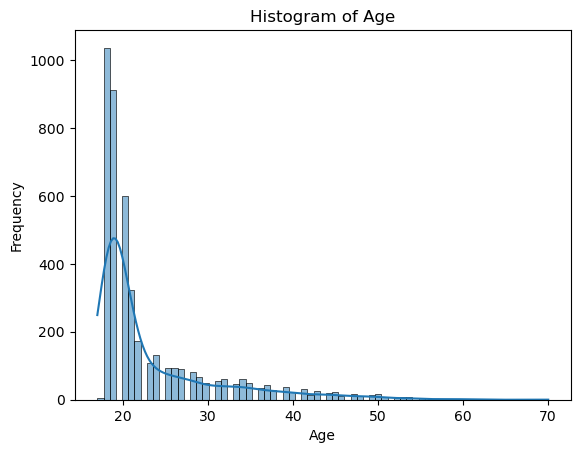

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Age at enrollment', kde=True)  
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()


In [15]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', '

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


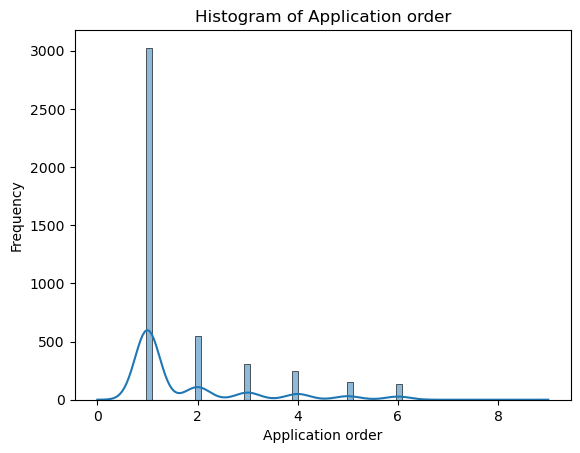

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


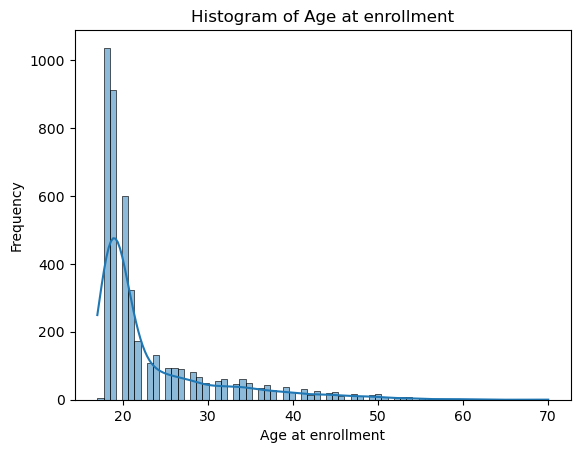

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


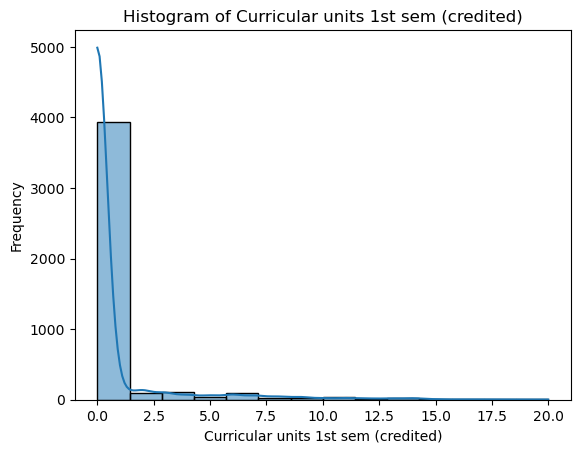

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


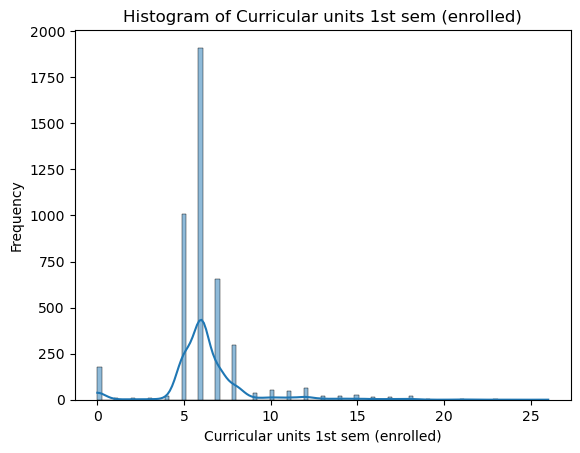

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


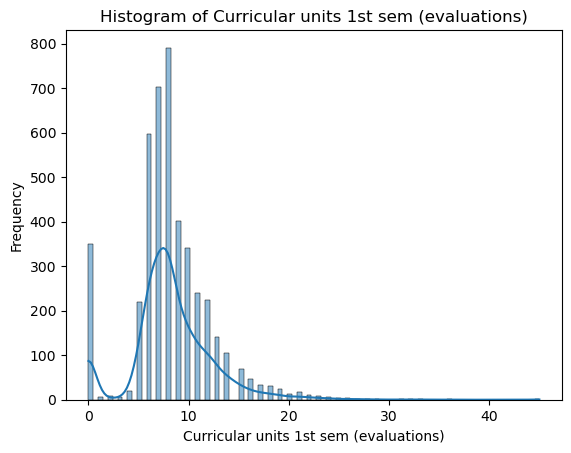

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


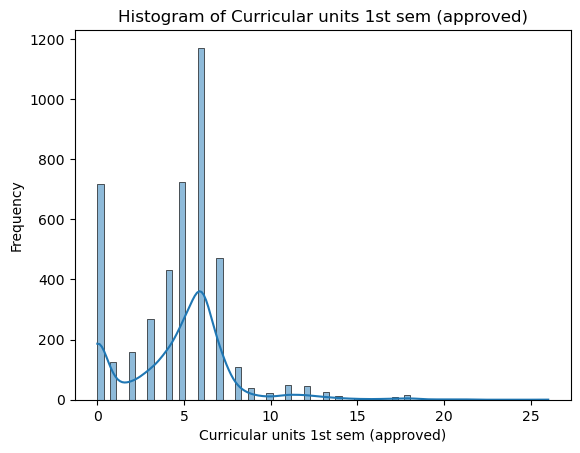

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


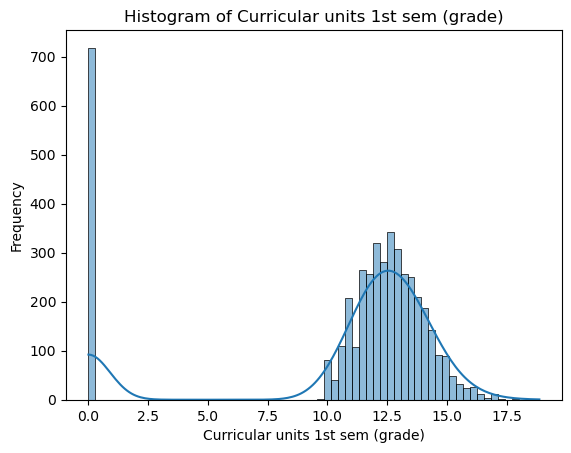

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


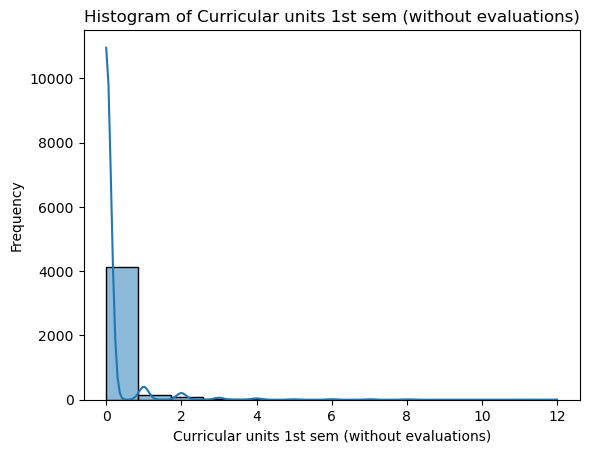

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


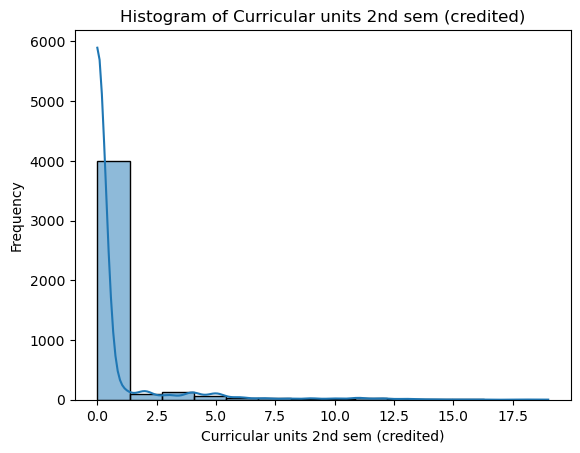

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


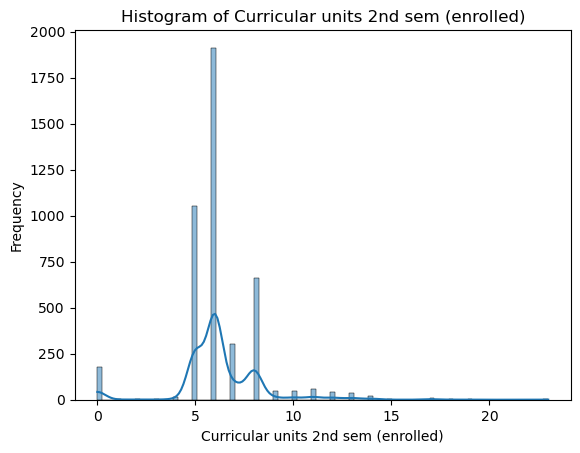

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


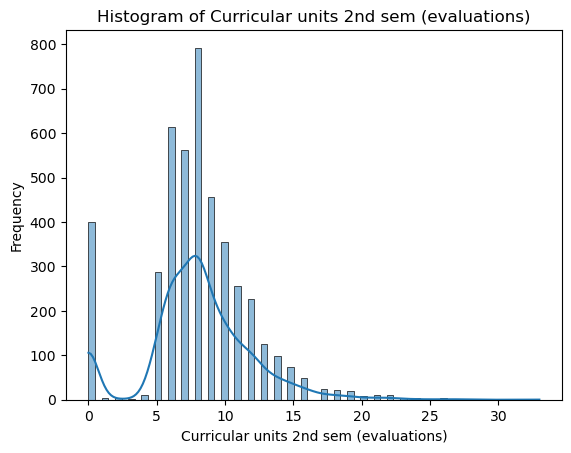

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


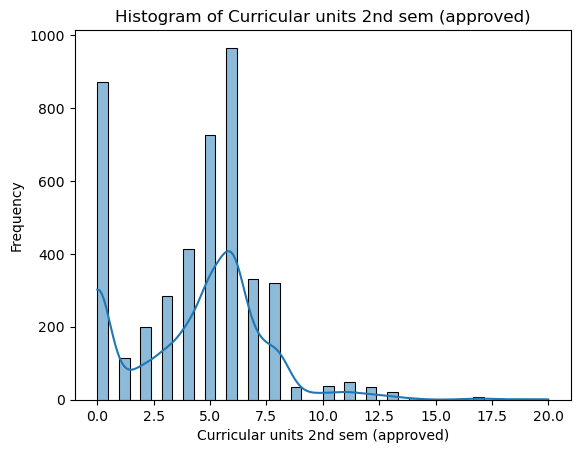

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


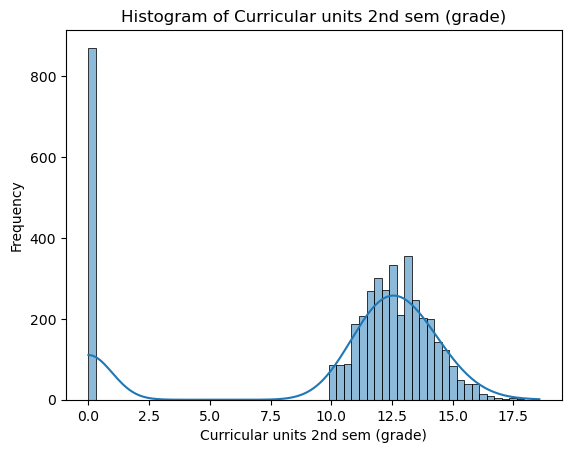

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


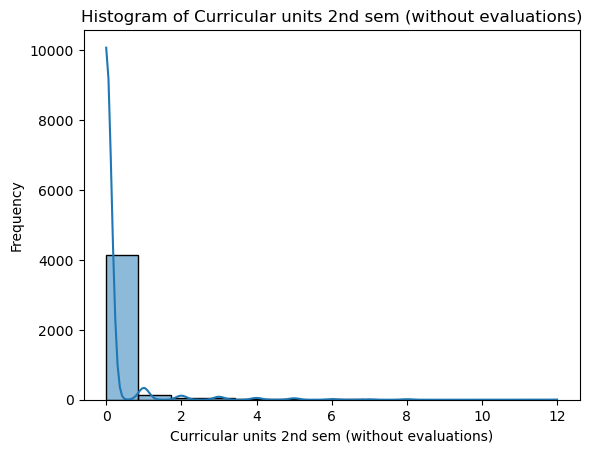

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


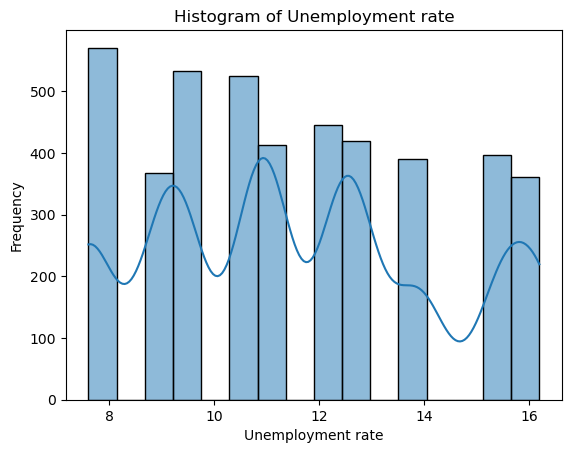

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


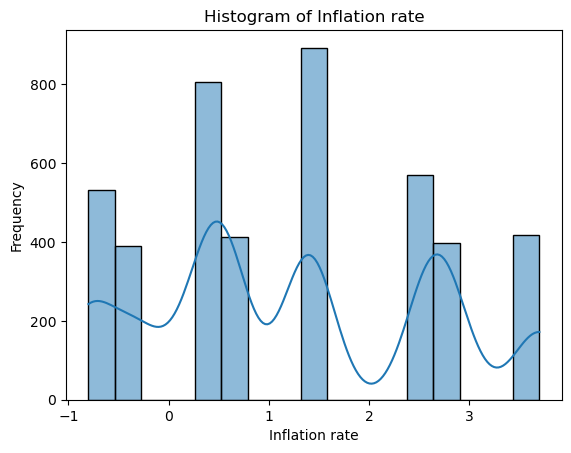

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


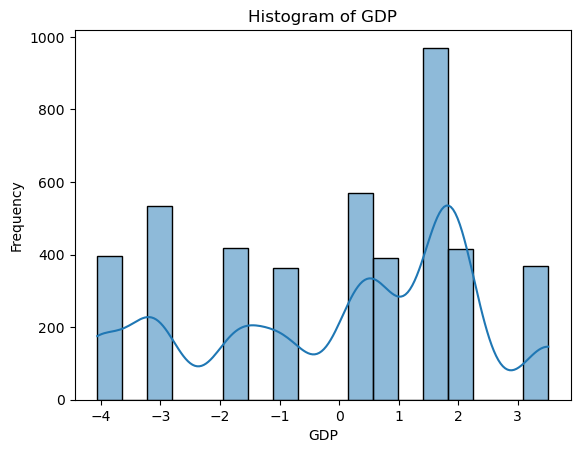

In [16]:
columns = df.select_dtypes(include=['float', int]).columns

for col in columns:
    sns.histplot(data=df, x=col, kde=True)  
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

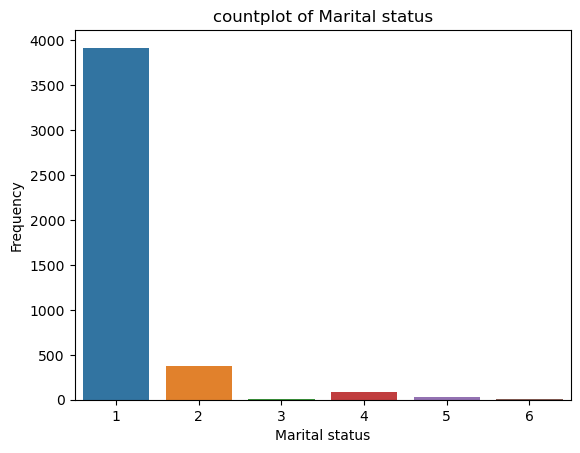

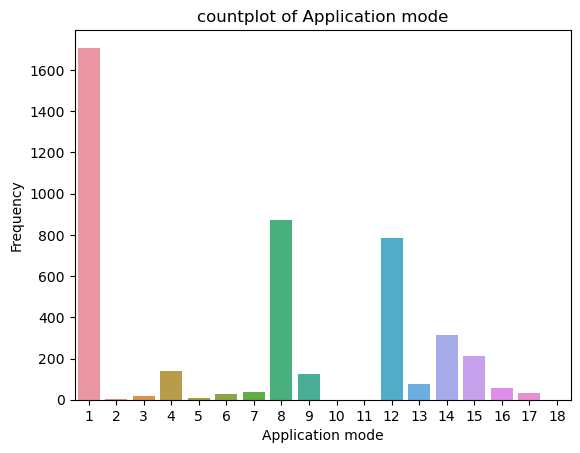

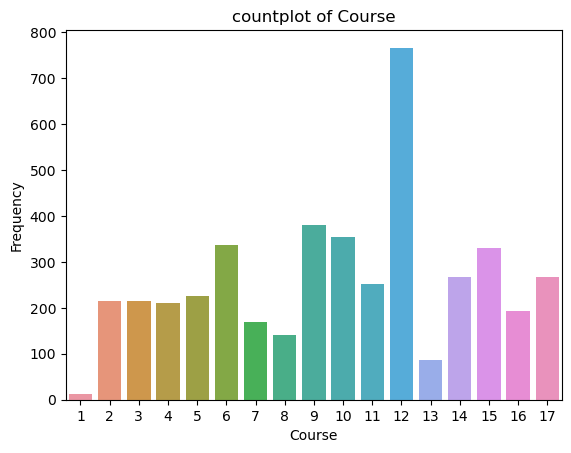

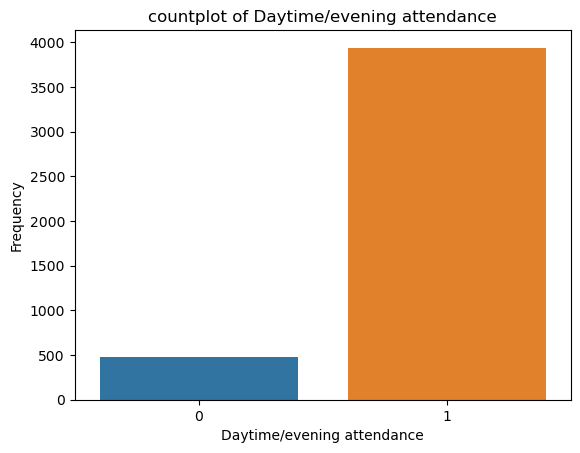

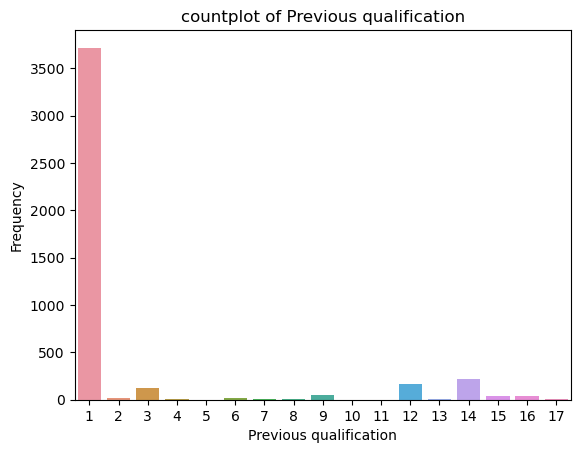

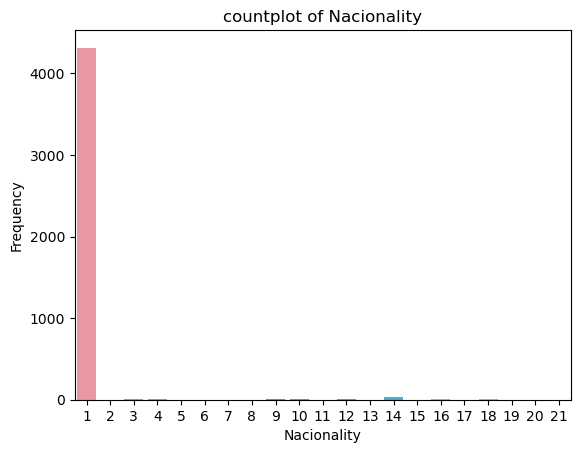

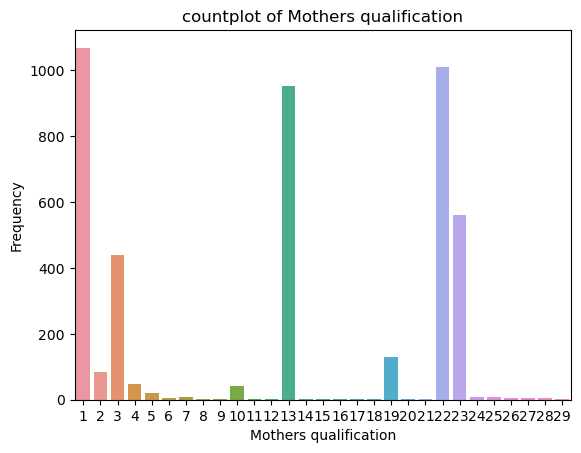

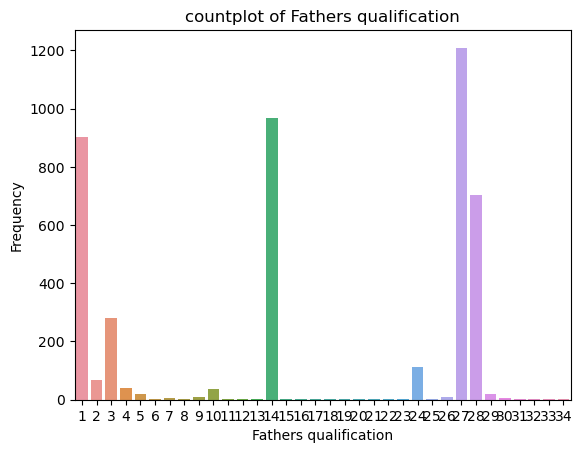

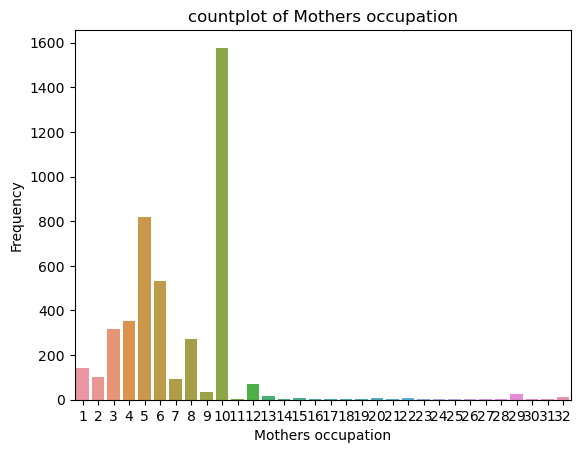

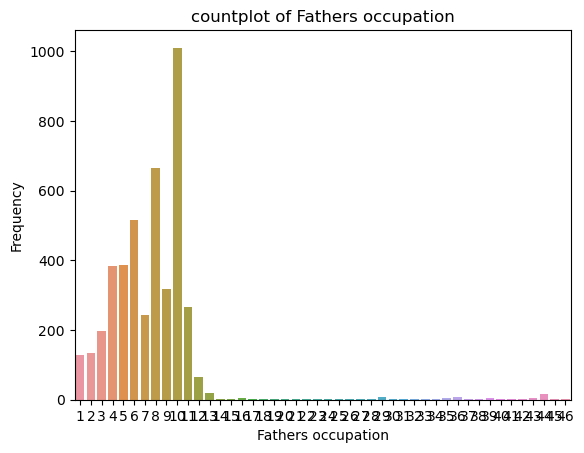

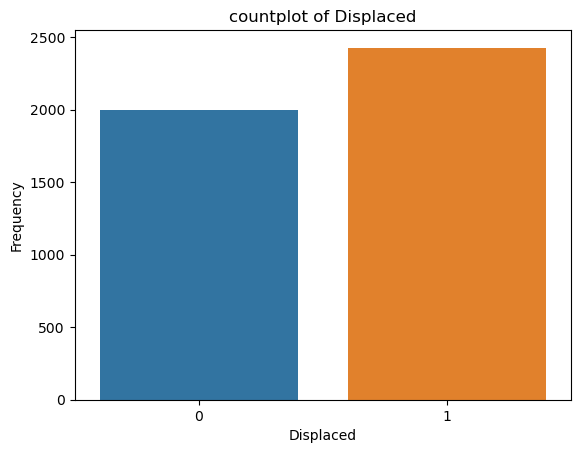

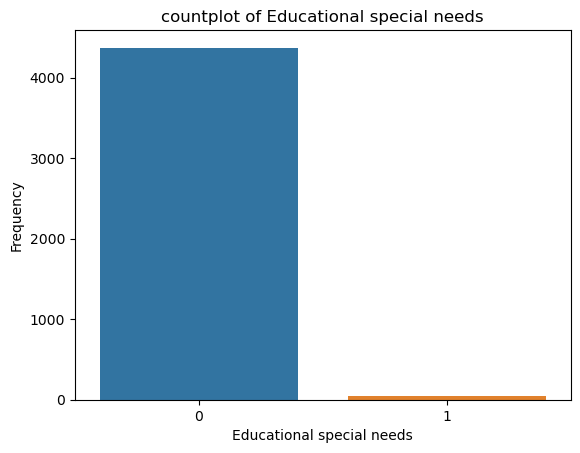

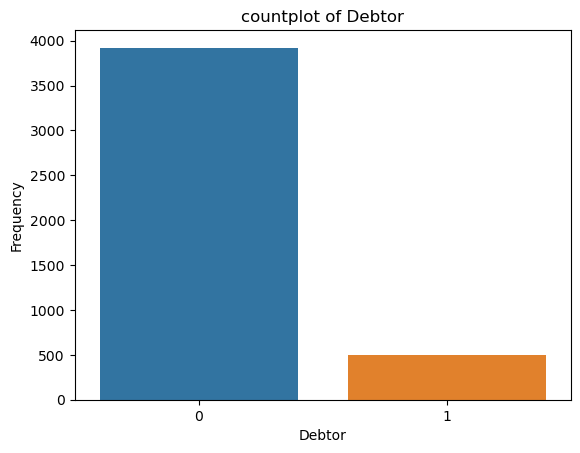

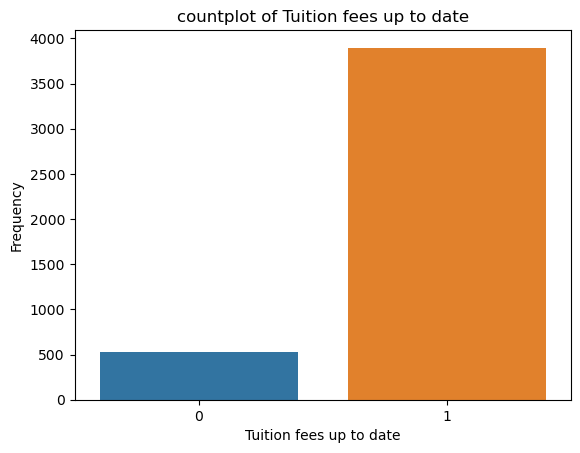

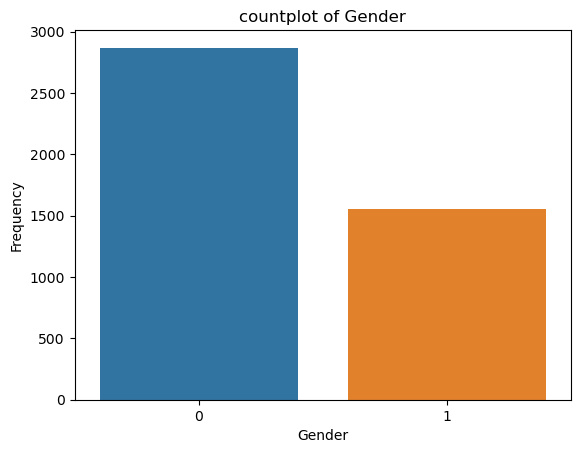

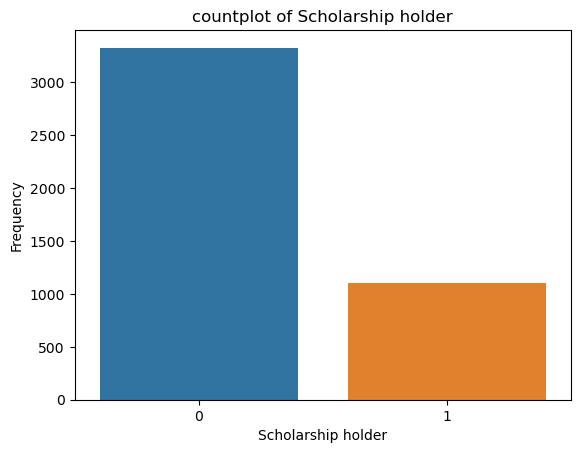

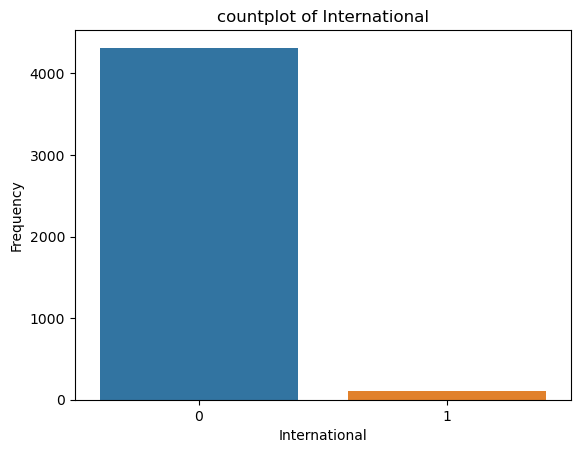

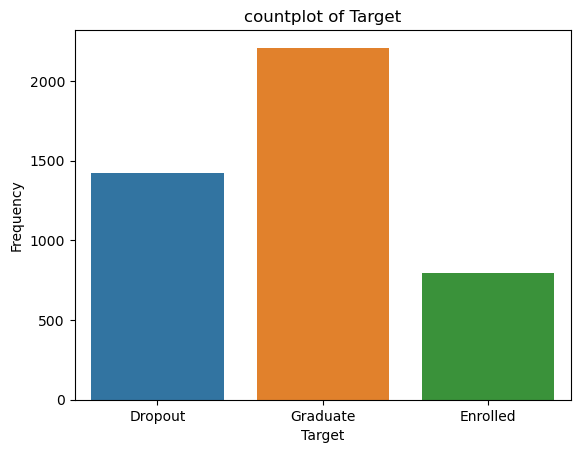

In [17]:
columns = df.select_dtypes(include=['object']).columns

for col in columns:
    sns.countplot(data=df, x=col)  
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'countplot of {col}')
    plt.show()

In [18]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


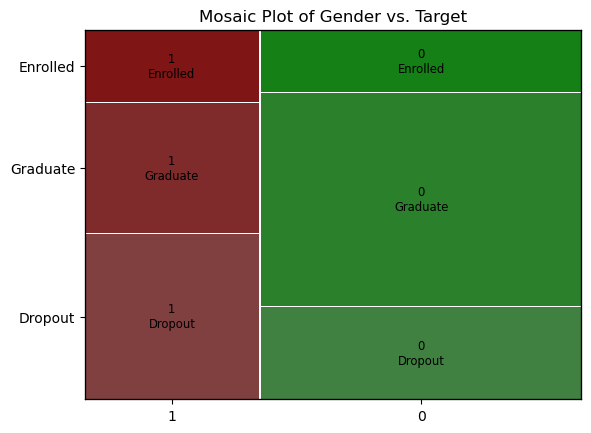

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Gender', 'Target'], title='Mosaic Plot of Gender vs. Target')
plt.show()


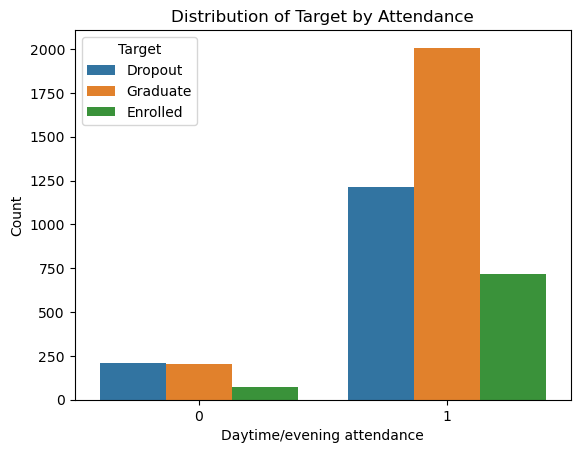

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Daytime/evening attendance', hue='Target')
plt.xlabel('Daytime/evening attendance')
plt.ylabel('Count')
plt.title('Distribution of Target by Attendance')
plt.show()


## In daytime evening classes, ratio of dropout to graduate is more in morning as compared to  evening classes.

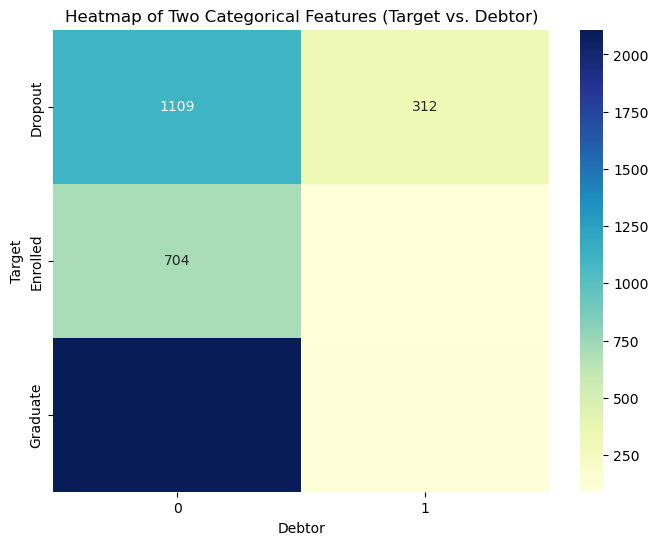

In [21]:
contingency_table = pd.crosstab(df['Target'], df['Debtor'])

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Debtor')
plt.ylabel('Target')
plt.title('Heatmap of Two Categorical Features (Target vs. Debtor)')
plt.show()

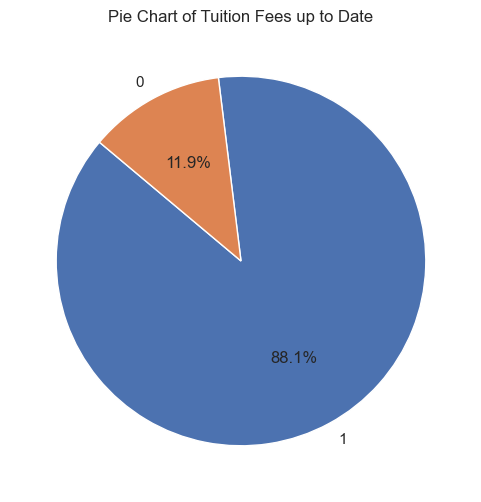

In [22]:
tuition_fee_counts = df['Tuition fees up to date'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))
plt.pie(tuition_fee_counts, labels=tuition_fee_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Tuition Fees up to Date')
plt.show()

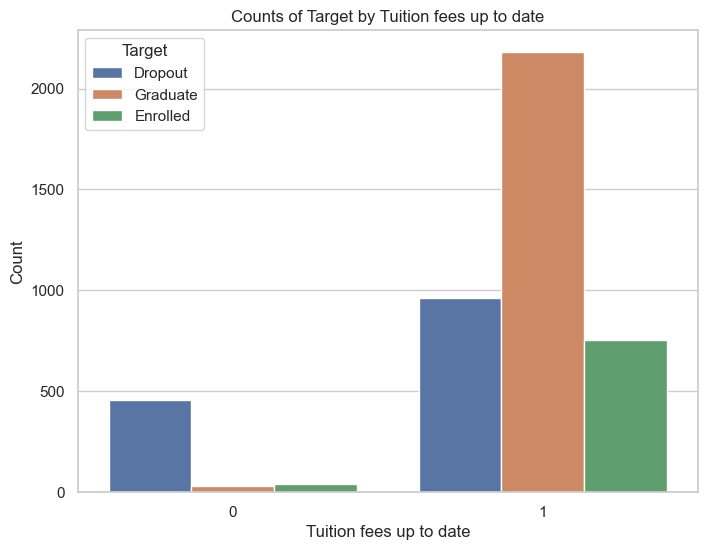

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Tuition fees up to date', hue='Target')
plt.xlabel('Tuition fees up to date')
plt.ylabel('Count')
plt.title('Counts of Target by Tuition fees up to date')
plt.show()

## Tution fees up to date plays a vv important role in determining the turnout of student as a dropout or graduate

In [24]:
df['Scholarship holder'].value_counts()

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64

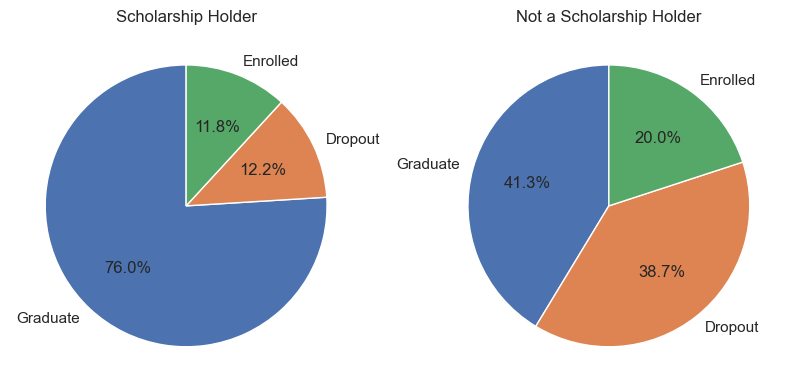

In [25]:
scholarship_counts = df[df['Scholarship holder'] == 1]['Target'].value_counts()
no_scholarship_counts = df[df['Scholarship holder'] == 0]['Target'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(scholarship_counts, labels=scholarship_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Scholarship Holder')
axes[1].pie(no_scholarship_counts, labels=no_scholarship_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Not a Scholarship Holder')
plt.show()


## Almost equal proportion of Graudate and Dropouts among students who dont have scholarship while a significant higher number of graduates are observed in students who have a scholarship

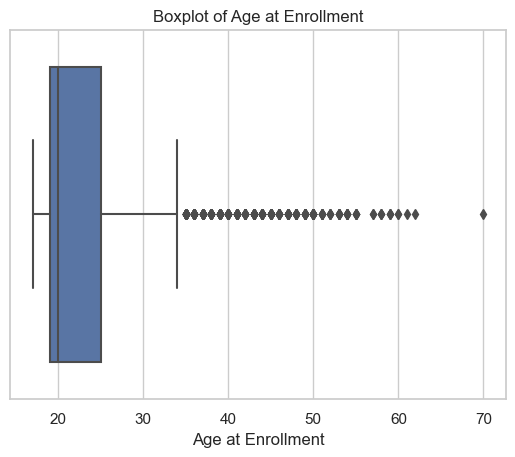

In [27]:
sns.boxplot(data=df, x='Age at enrollment')
plt.xlabel('Age at Enrollment')
plt.title('Boxplot of Age at Enrollment')
plt.show()

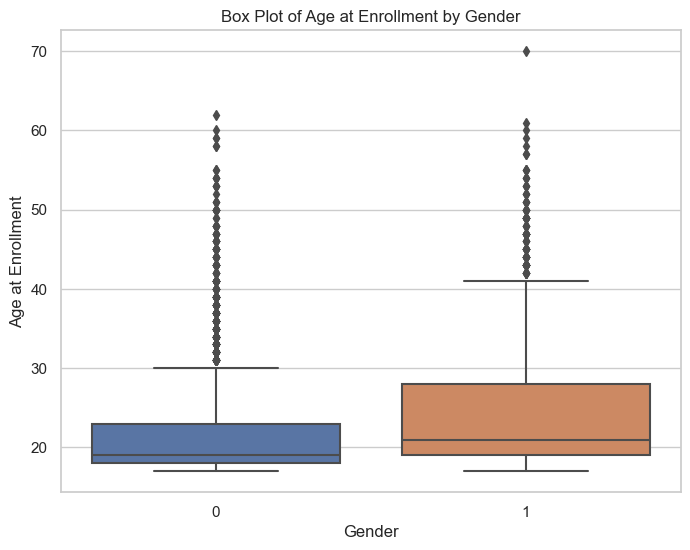

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Gender', y='Age at enrollment')
plt.xlabel('Gender')
plt.ylabel('Age at Enrollment')
plt.title('Box Plot of Age at Enrollment by Gender')
plt.show()


/var/folders/dz/vs7gf4pj5gx1yyb377lgxpg00000gn/T/ipykernel_7071/3632514330.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x='Gender', y='Curricular units 1st sem (grade)', ci='sd')


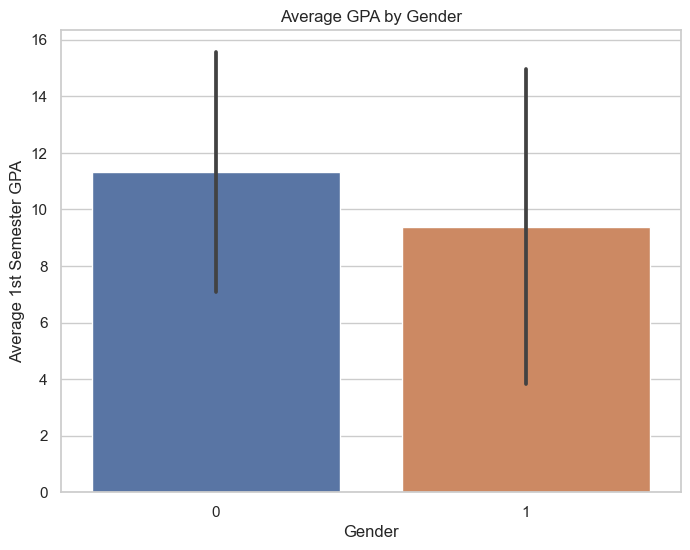

In [30]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Gender', y='Curricular units 1st sem (grade)', ci='sd')
plt.xlabel('Gender')
plt.ylabel('Average 1st Semester GPA')
plt.title('Average GPA by Gender')
plt.show()


In [31]:
df['International'].value_counts()

International
0    4314
1     110
Name: count, dtype: int64

Text(0.5, 1.0, 'Target Distribution Among Non-International Students')

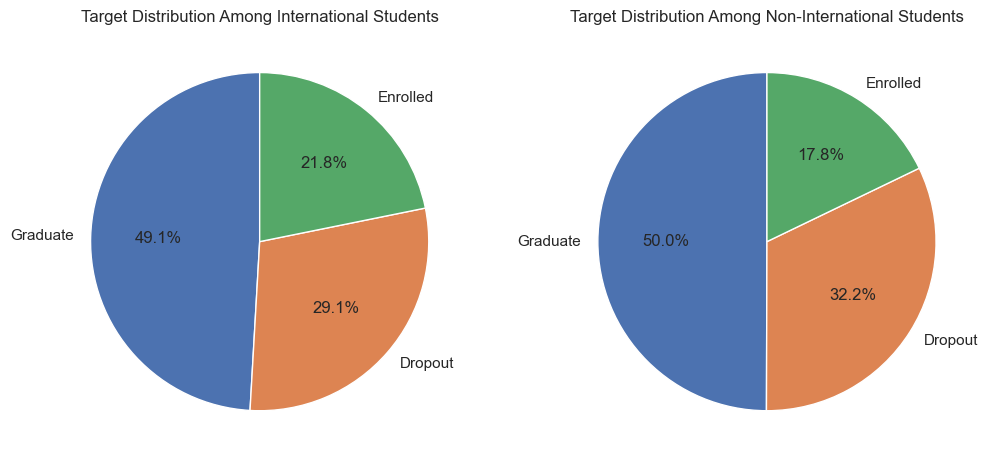

In [32]:
import matplotlib.pyplot as plt

# Filter the DataFrame for international students (assuming 1 represents international)
international_students = df[df['International'] == 1]
# Filter the DataFrame for non-international students (assuming 0 represents non-international)
non_international_students = df[df['International'] == 0]

# Calculate the distribution of 'Target' within international students
target_distribution_international = international_students['Target'].value_counts()
# Calculate the distribution of 'Target' within non-international students
target_distribution_non_international = non_international_students['Target'].value_counts()

# Create subplots for the two pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for international students
axes[0].pie(target_distribution_international, labels=target_distribution_international.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Target Distribution Among International Students')

# Pie chart for non-international students
axes[1].pie(target_distribution_non_international, labels=target_distribution_non_international.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Target Distribution Among Non-International Students')



In [36]:
# sns.countplot(data=df, x='Scholarship holder', hue='Gender')
# plt.xlabel('Scholarship Holder')
# plt.ylabel('Count')
# plt.title('Bar Plot of Scholarship Holders by Gender')
# plt.legend(title='Gender', loc='upper right')
# plt.show()

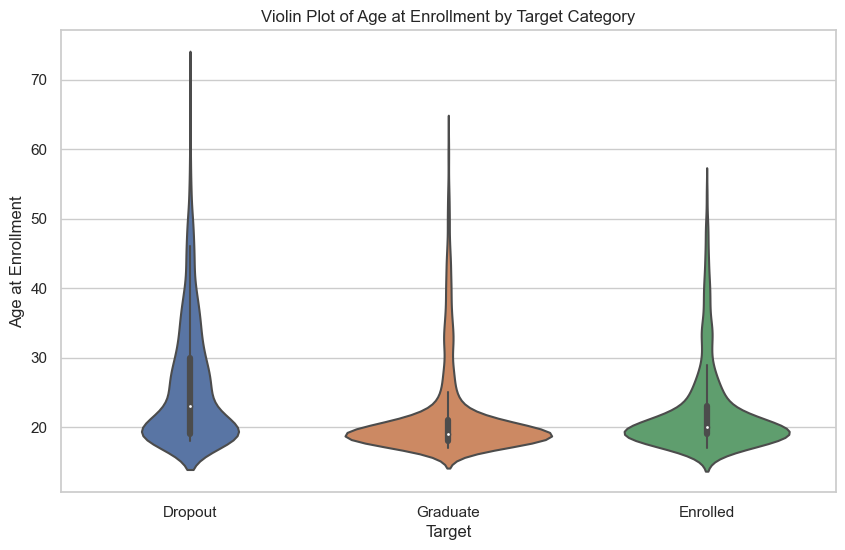

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Target', y='Age at enrollment')
plt.xlabel('Target')
plt.ylabel('Age at Enrollment')
plt.title('Violin Plot of Age at Enrollment by Target Category')
plt.show()


/var/folders/dz/vs7gf4pj5gx1yyb377lgxpg00000gn/T/ipykernel_95238/3957813758.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target_counts = df_copy.groupby(['Age_Group', 'Target']).size().unstack(fill_value=0)


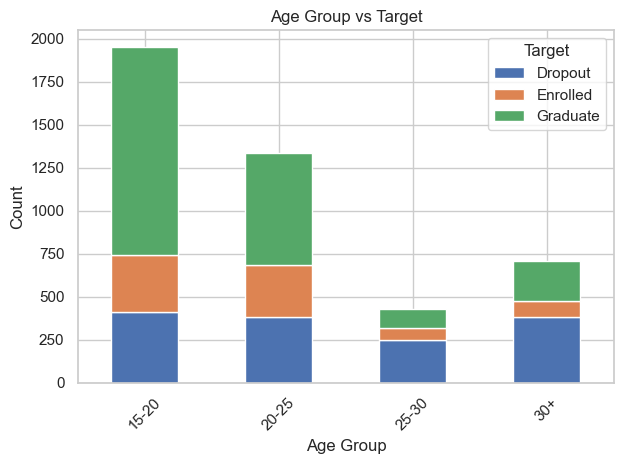

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a copy of the DataFrame to avoid modifying the original
df_copy = df.copy()

# Define age groups
age_bins = [15, 20, 25, 30, df_copy['Age at enrollment'].max()]
age_labels = ['15-20', '20-25', '25-30', '30+']
df_copy['Age_Group'] = pd.cut(df_copy['Age at enrollment'], bins=age_bins, labels=age_labels, right=False)

# Plotting Age Group vs. Target
age_target_counts = df_copy.groupby(['Age_Group', 'Target']).size().unstack(fill_value=0)
age_target_counts.plot(kind='bar', stacked=True)
plt.title('Age Group vs Target')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()
plt.show()

## In the age group, 15-20, maximum number of graduates can be seen, similarly in 20-25, but in 25-30 age group and 30+, there are more number of Dropout than Graduates

## There is inverse relationship between age and graduate

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


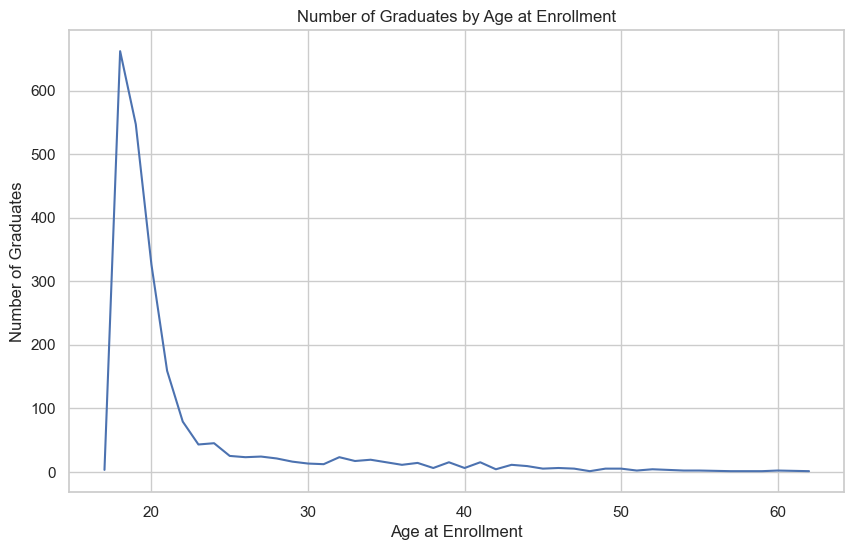

In [41]:

# Filter the DataFrame for Target == "Graduate"
graduate_df = df[df['Target'] == 'Graduate']

# Group by Age_at_enrollment and count the occurrences
age_counts = graduate_df['Age at enrollment'].value_counts().sort_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=age_counts.index, y=age_counts.values)
plt.title('Number of Graduates by Age at Enrollment')
plt.xlabel('Age at Enrollment')
plt.ylabel('Number of Graduates')
plt.grid(True)
plt.show()

In [ ]:
# Filter DataFrame for age groups 25-30 and 30+
age_group_25_30 = df_copy[(df_copy['Age at enrollment'] >= 25) & (df_copy['Age at enrollment'] <= 30)]
age_group_30_plus = df_copy[df_copy['Age at enrollment'] > 30]

# Calculate the number of people in each group
count_25_30 = len(age_group_25_30)
count_30_plus = len(age_group_30_plus)

print("Number of people in age group 25-30:", count_25_30)
print("Number of people in age group 30+:", count_30_plus)

Number of people in age group 25-30: 476
Number of people in age group 30+: 662


In [ ]:
# Group DataFrame by 'Age_Group' and 'Target', and count occurrences
age_target_counts = df_copy.groupby(['Age_Group', 'Target']).size().unstack(fill_value=0)

# Print the counts
print("Within age group 25-30:")
print("Number of graduates:", age_target_counts.loc['25-30', 'Graduate'])
print("Number of dropouts:", age_target_counts.loc['25-30', 'Dropout'])
print("Number of enrolled:", age_target_counts.loc['25-30', 'Enrolled'])
print("\nWithin age group 30+:")
print("Number of graduates:", age_target_counts.loc['30+', 'Graduate'])
print("Number of dropouts:", age_target_counts.loc['30+', 'Dropout'])
print("Number of enrolled:", age_target_counts.loc['30+', 'Enrolled'])

Within age group 25-30:
Number of graduates: 109
Number of dropouts: 246
Number of enrolled: 72

Within age group 30+:
Number of graduates: 236
Number of dropouts: 384
Number of enrolled: 90


/var/folders/dz/vs7gf4pj5gx1yyb377lgxpg00000gn/T/ipykernel_95238/1950052687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_target_counts = df_copy.groupby(['Age_Group', 'Target']).size().unstack(fill_value=0)


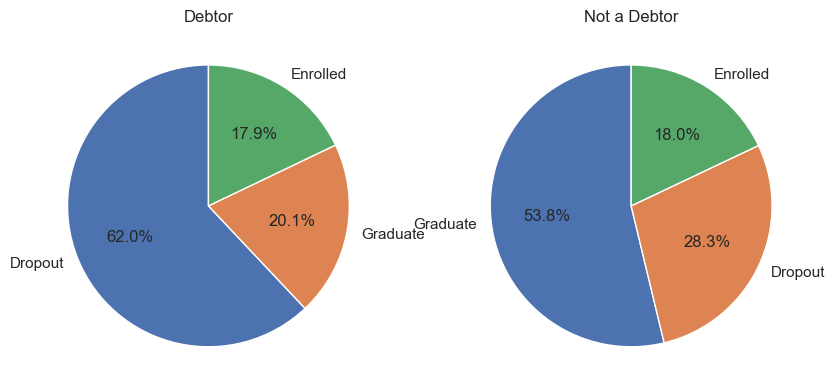

In [ ]:
Debtor_counts = df[df['Debtor'] == 1]['Target'].value_counts()
no_Debtor_counts = df[df['Debtor'] == 0]['Target'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(Debtor_counts, labels=Debtor_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Debtor')
axes[1].pie(no_Debtor_counts, labels=no_Debtor_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Not a Debtor')
plt.show()

## Students with Debt are more likely to dropout.

In [ ]:
df.Debtor.value_counts()

Debtor
0    3921
1     503
Name: count, dtype: int64

In [ ]:
df["Previous qualification"].value_counts()

Previous qualification
1     3717
14     219
12     162
3      126
9       45
15      40
16      36
2       23
6       16
7       11
4        8
13       7
17       6
8        4
11       2
5        1
10       1
Name: count, dtype: int64

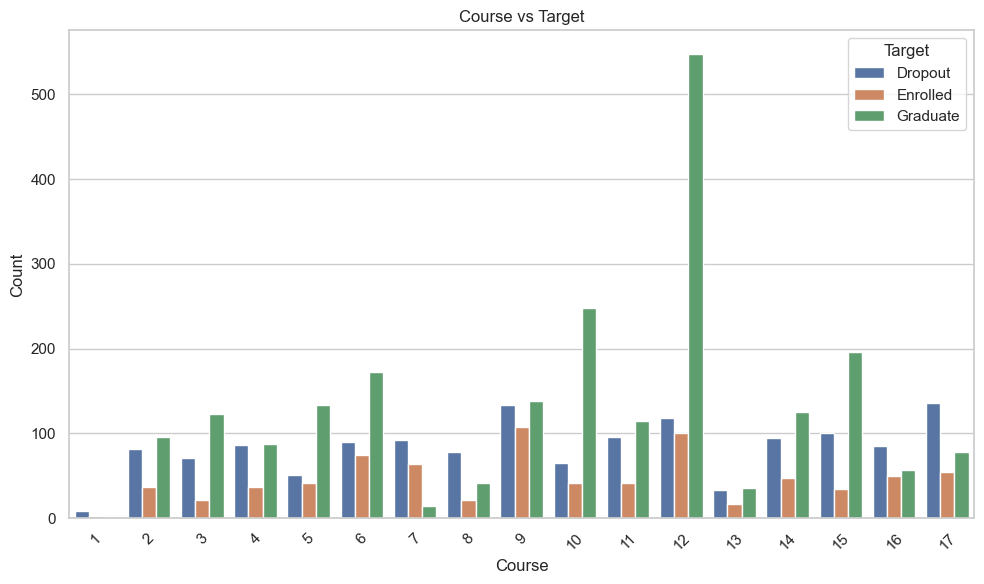

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns "course" and "target"
# df = ...

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Course', hue='Target')
plt.title('Course vs Target')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Target')
plt.tight_layout()
plt.show()



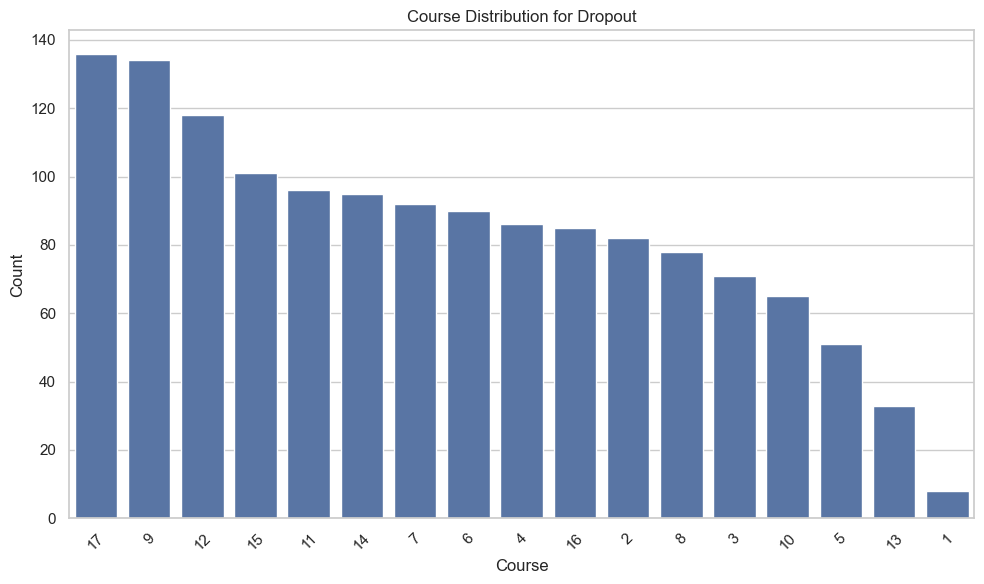

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter DataFrame for 'dropout' category in the 'target' column
df_dropout = df[df['Target'] == 'Dropout']

# Get the order of 'course' categories sorted by count of 'dropout'
course_order = df_dropout['Course'].value_counts().index

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=df_dropout, x='Course', order=course_order)
plt.title('Course Distribution for Dropout')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [42]:
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Select the subset of DataFrame where "Target" is equal to "Dropout" and "Curricular units 1st sem (grade)" column
dropout_grades = df[df["Target"] == "Dropout"]["Curricular units 1st sem (grade)"]

# Display as DataFrame
dropout_grades_df = pd.DataFrame(dropout_grades)
print(dropout_grades_df)


      Curricular units 1st sem (grade)
0                             0.000000
2                             0.000000
7                             0.000000
9                            11.400000
12                            0.000000
...                                ...
4408                         11.400000
4411                         12.500000
4415                         12.333333
4420                         12.000000
4421                         14.912500

[1421 rows x 1 columns]


In [43]:
dropout_grades_df.describe()

,Curricular units 1st sem (grade)
count,1421.000000
mean,7.256656
std,6.031120
min,0.000000
25%,0.000000
50%,10.928571
75%,12.200000
max,18.000000


## Median grade of 1st sem for dropout students is 10.9

In [44]:
import pandas as pd

# Assuming df is your DataFrame
# df = ...

# Define the columns you want to include
desired_columns = ['Curricular units 1st sem (grade)',
                   'Curricular units 2nd sem (grade)']

# Select the subset of DataFrame where "Target" is equal to "Dropout" and desired columns
subset_df = df.loc[df["Target"] == "Dropout", ['Target'] + desired_columns]

# Display the subset DataFrame
subset_df


,Target,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
0,Dropout,0.000000,0.000000
2,Dropout,0.000000,0.000000
7,Dropout,0.000000,0.000000
9,Dropout,11.400000,13.500000
12,Dropout,0.000000,0.000000
...,...,...,...
4408,Dropout,11.400000,11.666667
4411,Dropout,12.500000,13.333333
4415,Dropout,12.333333,11.083333
4420,Dropout,12.000000,11.000000


In [45]:
subset_df.describe()

,Curricular units 1st sem (grade),Curricular units 2nd sem (grade)
count,1421.000000,1421.000000
mean,7.256656,5.899339
std,6.031120,6.118740
min,0.000000,0.000000
25%,0.000000,0.000000
50%,10.928571,0.000000
75%,12.200000,11.833333
max,18.000000,17.714286


## Outlier Indentification

In [47]:
import pandas as pd
import numpy as np


# Step 1: Arrange column age in ascending order and put result in another variable
sorted_age = df['Age at enrollment'].sort_values()

# Step 2: Find out 25th and 75th percentiles
Q1 = np.percentile(sorted_age, 25)
Q3 = np.percentile(sorted_age, 75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Calculate the upper bound for outliers
upper_bound = Q3 + 1.5 * IQR

# Show results
print("25th percentile (Q1):", Q1)
print("75th percentile (Q3):", Q3)
print("Upper bound for outliers (Q3 + 1.5 * IQR):", upper_bound)

25th percentile (Q1): 19.0
75th percentile (Q3): 25.0
Upper bound for outliers (Q3 + 1.5 * IQR): 34.0


In [48]:
df1= df[df["Age at enrollment"]>34]

In [52]:
df1['Target'].value_counts()

Target
Dropout     237
Graduate    152
Enrolled     52
Name: count, dtype: int64

In [54]:
152/441

0.34467120181405897

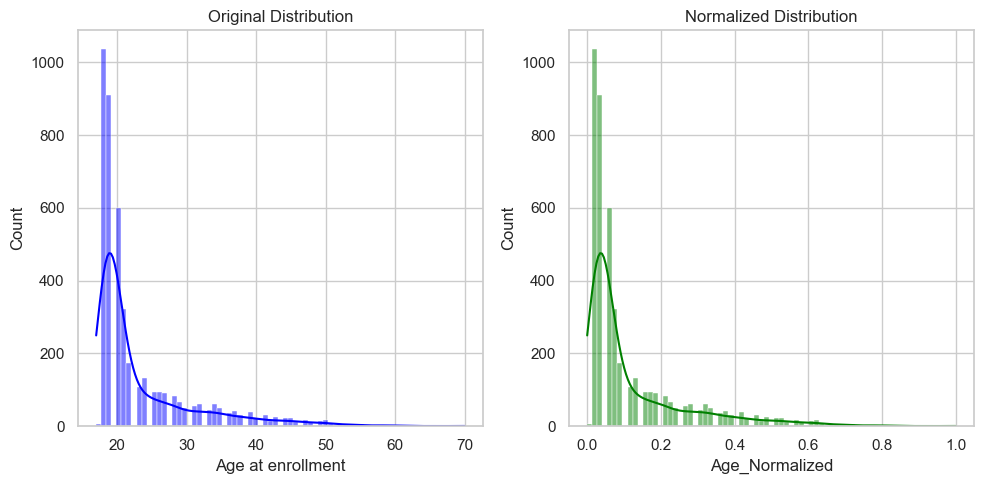

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame containing the 'Age at enrollment' column
# df = ...

# Define a function for Min-Max scaling
def min_max_scaling(data):
    return (data - data.min()) / (data.max() - data.min())

# Normalize 'Age at enrollment' column using Min-Max scaling
df['Age_Normalized'] = min_max_scaling(df['Age at enrollment'])

# Visualize the distribution before and after normalization
plt.figure(figsize=(10, 5))

# Plot original distribution
plt.subplot(1, 2, 1)
sns.histplot(df['Age at enrollment'], kde=True, color='blue')
plt.title('Original Distribution')

# Plot normalized distribution
plt.subplot(1, 2, 2)
sns.histplot(df['Age_Normalized'], kde=True, color='green')
plt.title('Normalized Distribution')

plt.tight_layout()
plt.show()

In [58]:
con_feats = df.select_dtypes(include=['float', 'int']).columns
# info we need
info_cols = ['min', 'max', 'mean', '50%', 'std']

print("Training sets overview: ")
display(df[con_feats].describe().loc[info_cols])

Training sets overview: 


,Application order,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935


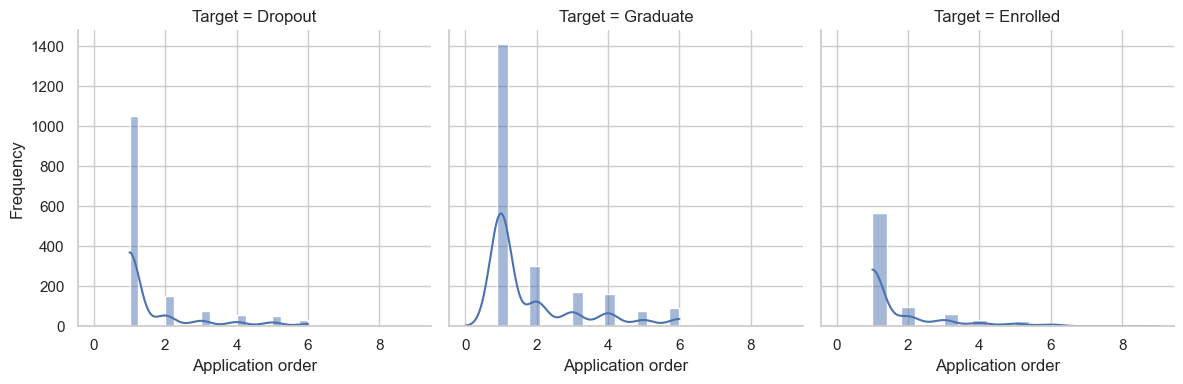

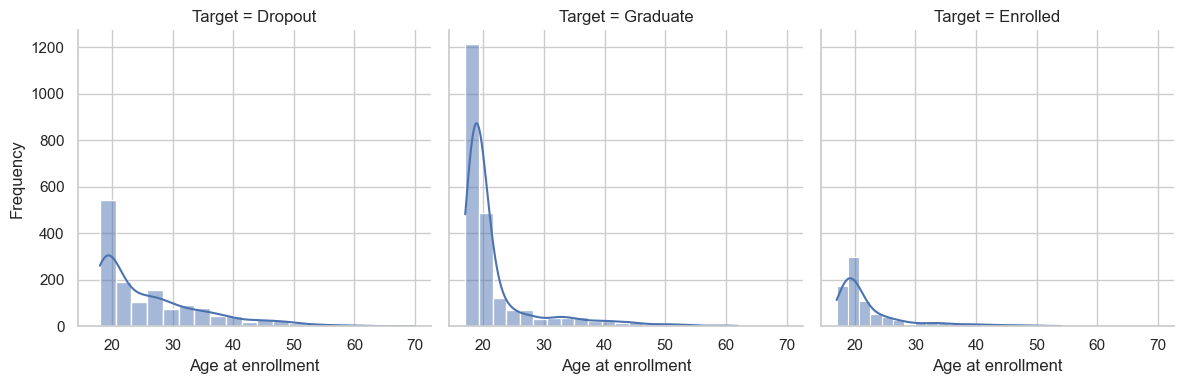

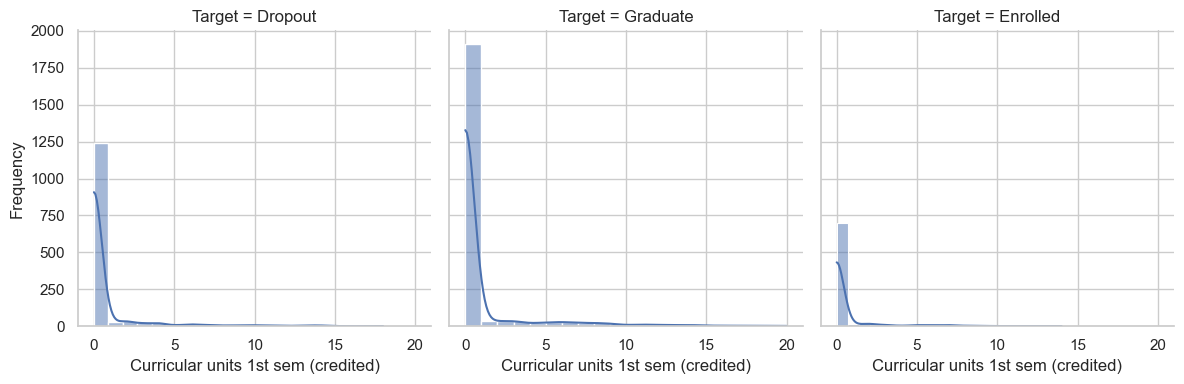

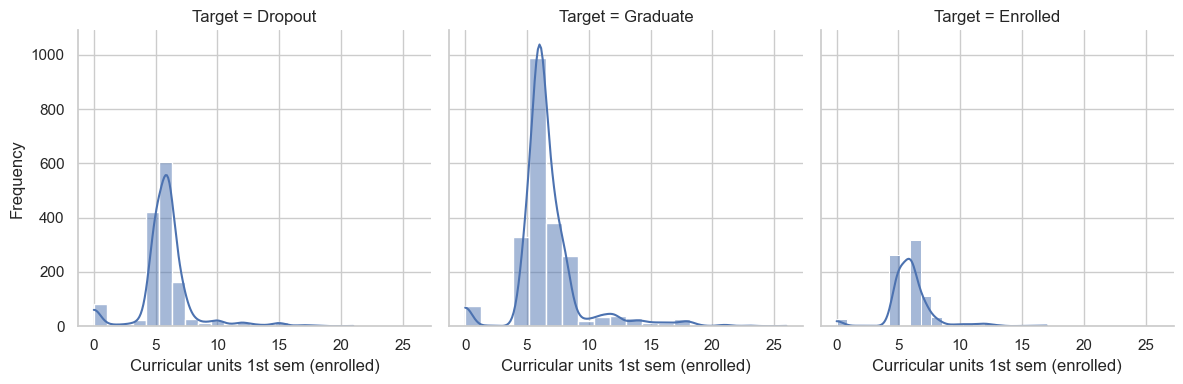

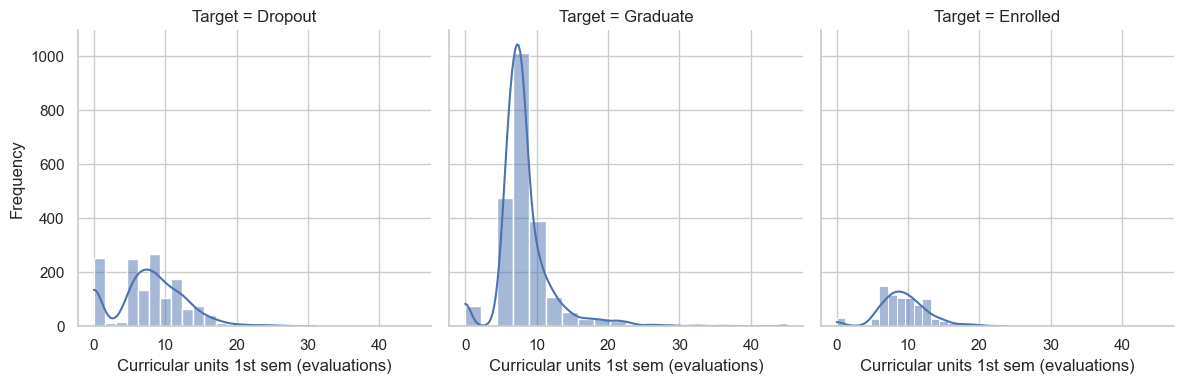

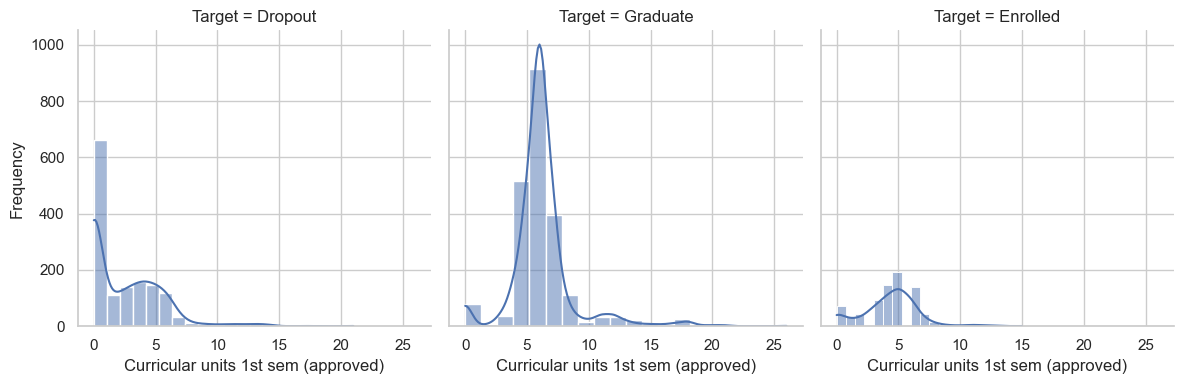

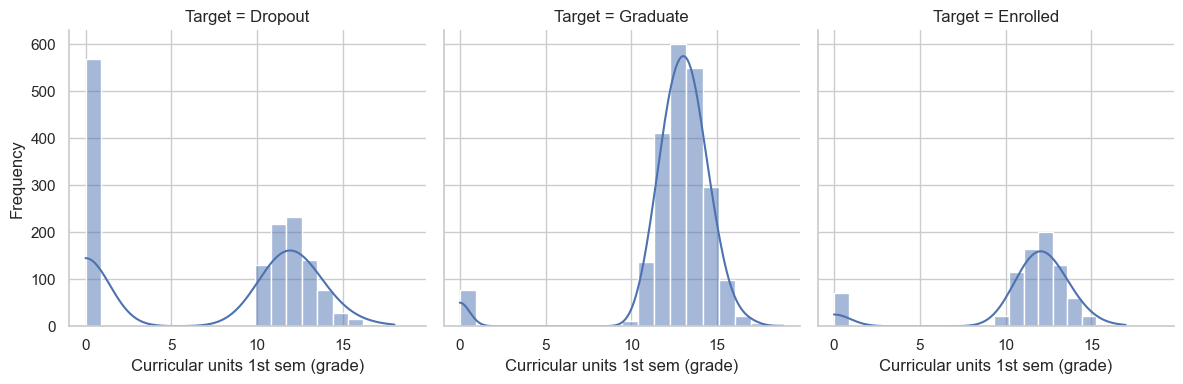

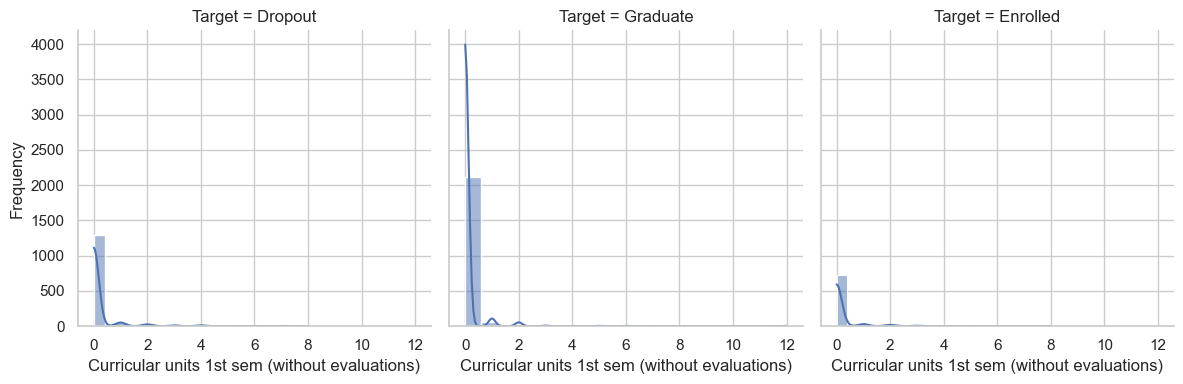

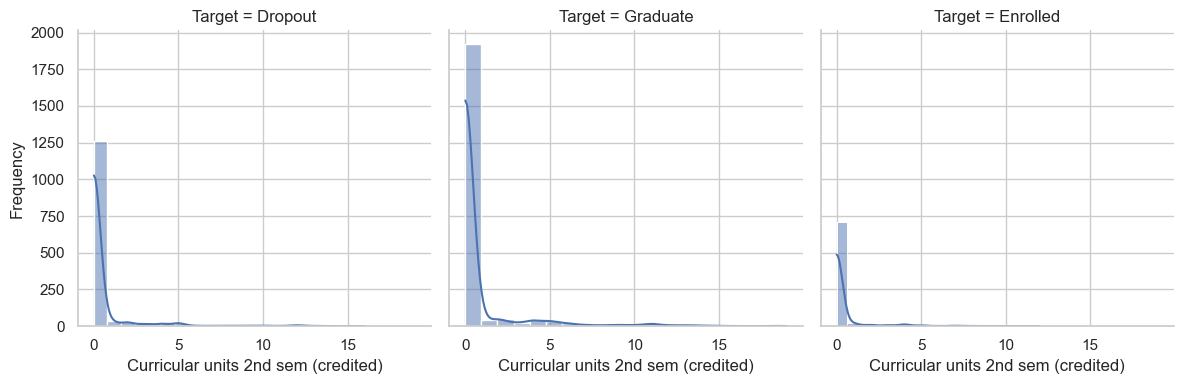

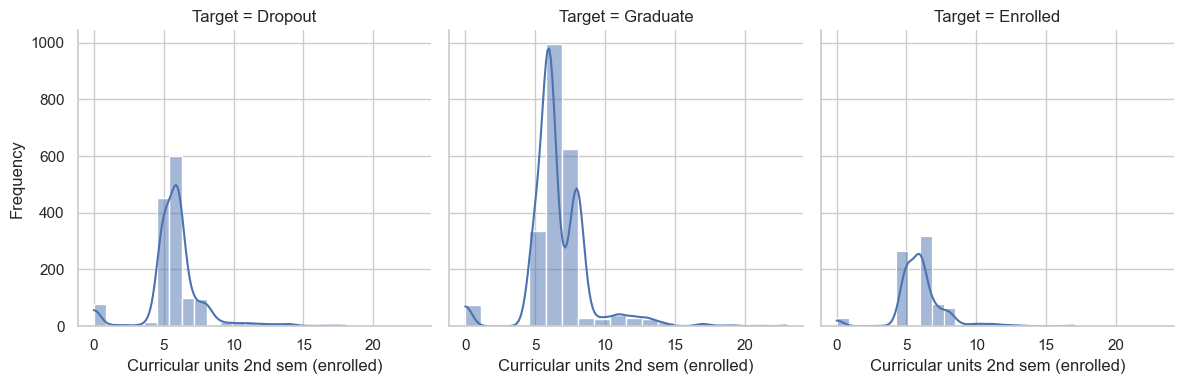

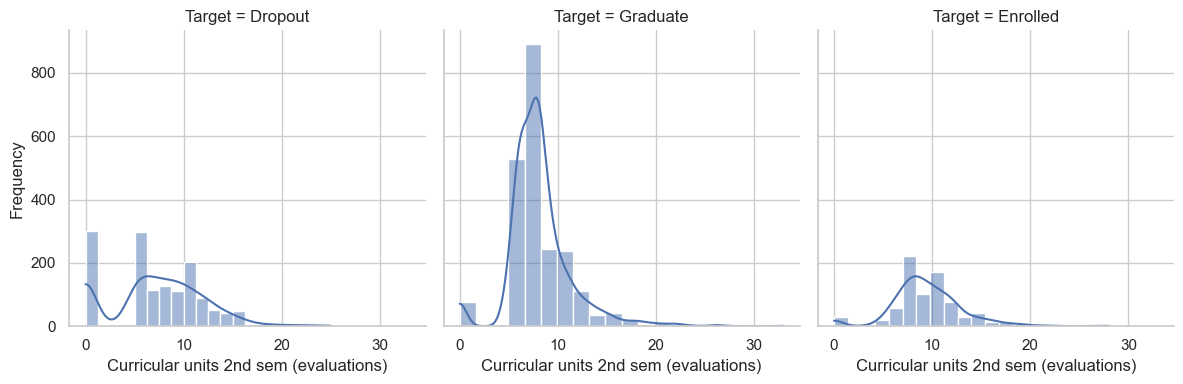

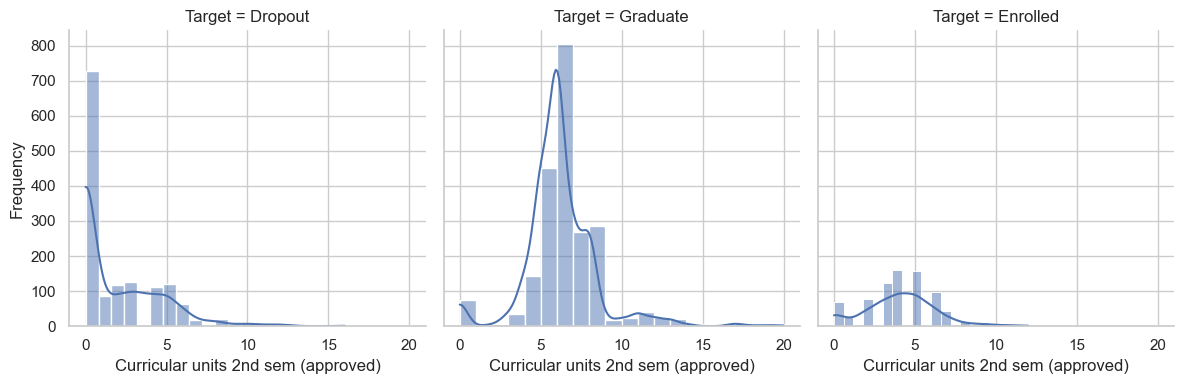

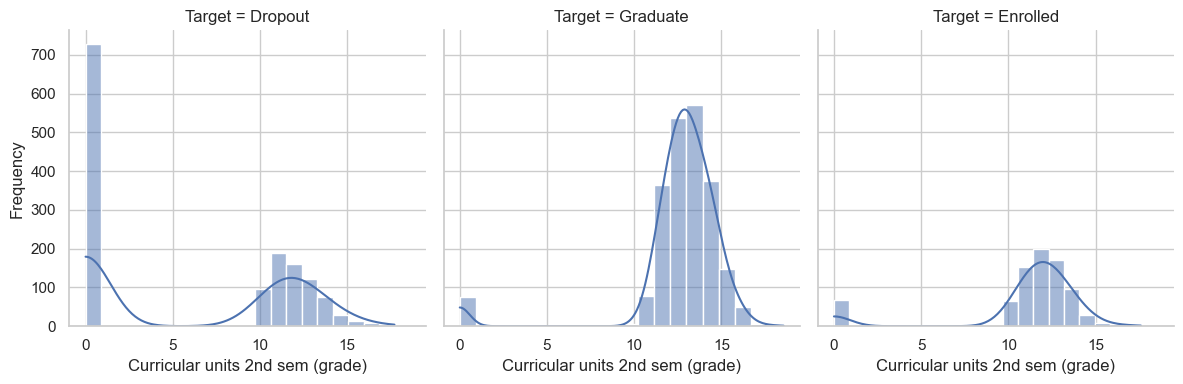

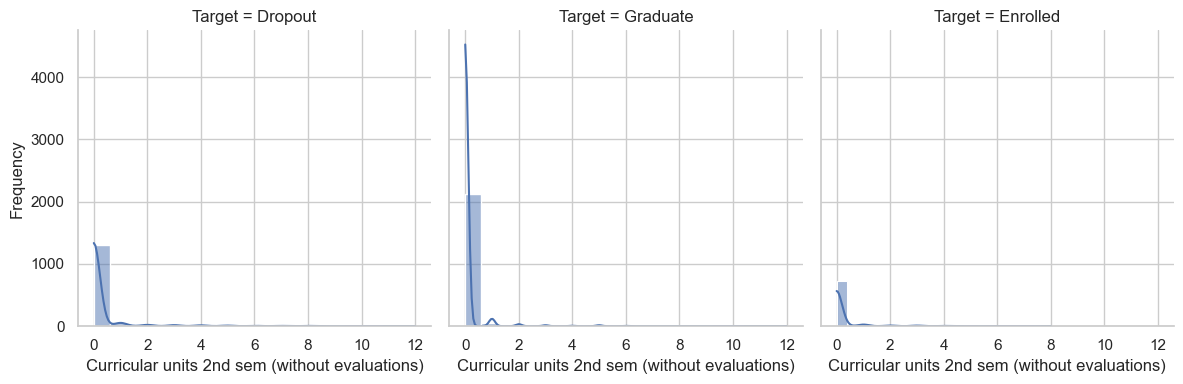

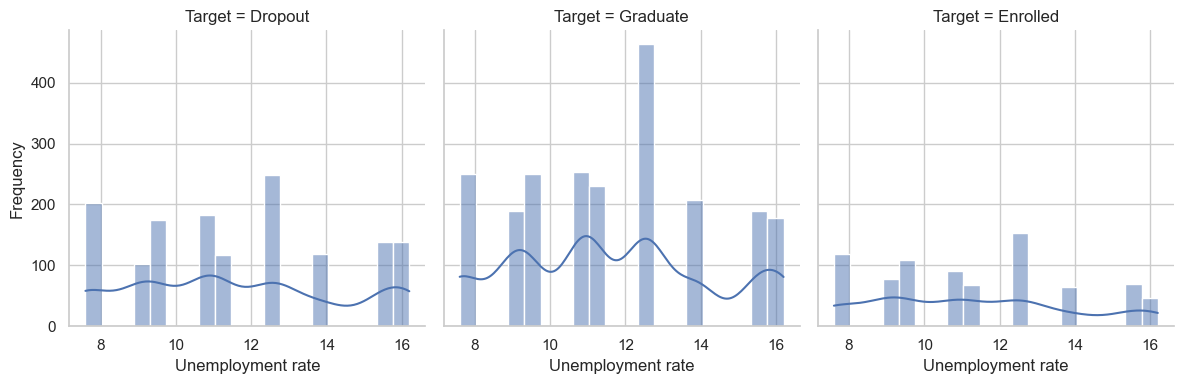

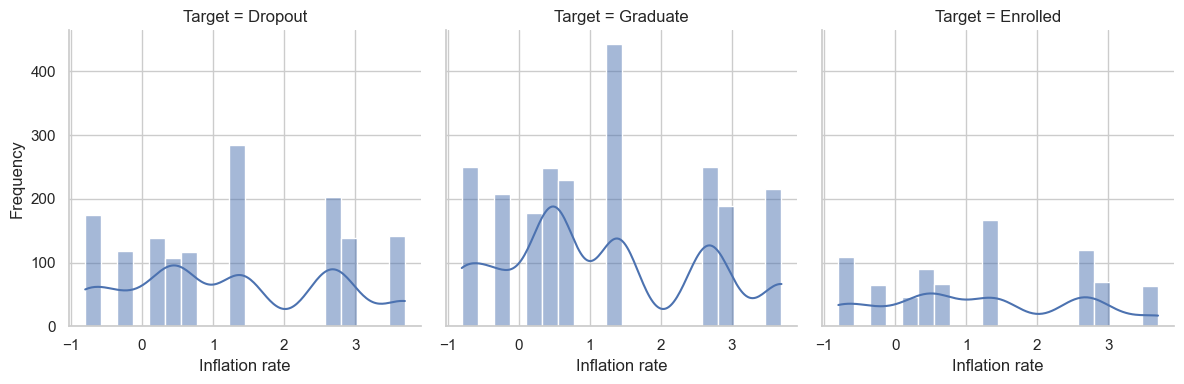

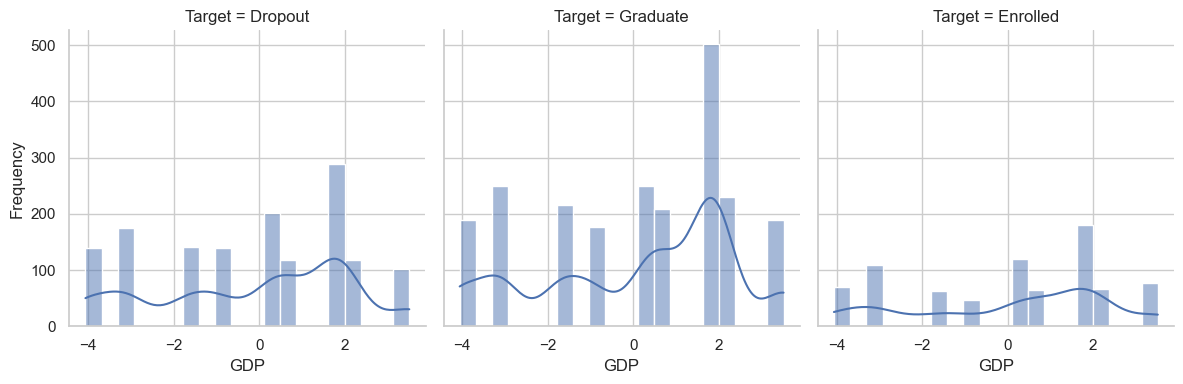

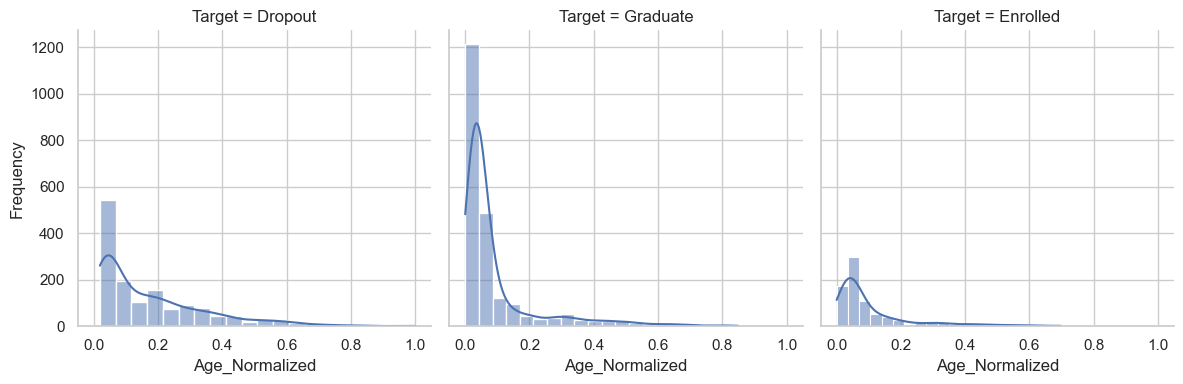

In [ ]:
for feature in con_feats:
    g = sns.FacetGrid(df, col='Target', height=4, aspect=1)
    g.map(sns.histplot, feature, bins=20, kde=True)
    g.set_axis_labels(feature, 'Frequency')
    g.set_titles(col_template="Target = {col_name}")
    plt.show()


In [55]:
cat_feats = df.select_dtypes(include='object').columns
cat_feats

Index(['Marital status', 'Application mode', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mothers qualification', 'Fathers qualification', 'Mothers occupation',
       'Fathers occupation', 'Displaced', 'Educational special needs',
       'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'International', 'Target'],
      dtype='object')

/var/folders/dz/vs7gf4pj5gx1yyb377lgxpg00000gn/T/ipykernel_7071/2047949223.py:24: RuntimeWarning: divide by zero encountered in log10
  chi2_results['disparity'] = -np.log10(chi2_results['Pvals'].values)


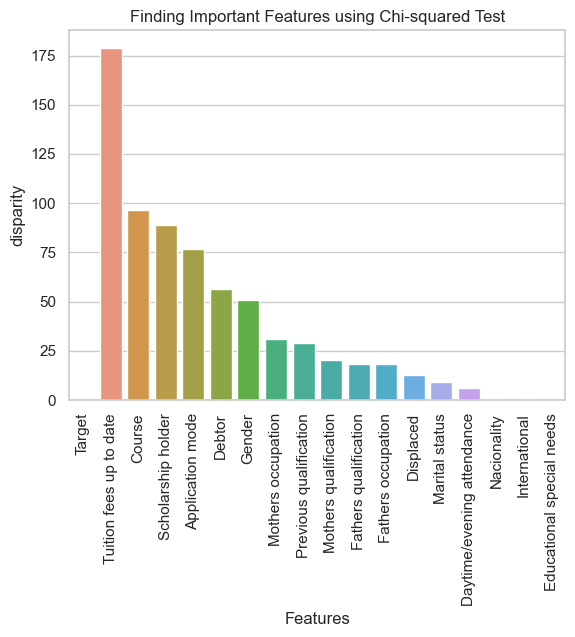

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Define your chi-squared test function
def chi2_test(frame):
    chi2_result = pd.DataFrame()
    chi2_result['Features'] = cat_feats
    pvals = []

    for feat in chi2_result['Features']:
        contingency_table = pd.crosstab(df[feat], df['Target'])
        chi2, pval, _, _ = chi2_contingency(contingency_table)
        pvals.append(pval)

    chi2_result['Pvals'] = pvals

    return chi2_result.sort_values(by='Pvals')

# Call the chi-squared test function
chi2_results = chi2_test(df)
chi2_results['disparity'] = -np.log10(chi2_results['Pvals'].values)
sns.barplot(data=chi2_results, x='Features', y='disparity')
plt.xticks(rotation=90)
plt.title("Finding Important Features using Chi-squared Test")
plt.show()


In [60]:
# plt.figure(figsize=(24, 24))
# correlation_matrix = df[con_feats].corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
# plt.title('Correlation Heatmap')
# plt.show()

In [ ]:
#!pip install mitosheet

In [ ]:
#!pip install mitoinstaller

In [ ]:
#import mitosheet

In [ ]:
#mitosheet.sheet(df, analysis_to_replay="id-vbnuvaxwmo")

In [68]:
# from pydantic_settings import BaseSettings
# from pandas_profiling import ProfileReport
# import pandas as pd

# # Define your settings class by inheriting from BaseSettings
# class MySettings(BaseSettings):
#     app_name: str = "My App"
#     debug: bool = False

# # Create an instance of your settings class
# settings = MySettings()

# # Load your dataset into a DataFrame
# df = pd.read_csv('your_dataset.csv')

# # Create a ProfileReport instance
# profile = ProfileReport(df, **kwargs)

# # Generate the report
# profile.to_file('data_report.html')  # Save the report to an HTML file


In [71]:
# ! pip install dataprep
# # import dataprep

In [72]:
# from dataprep.eda import create_report, plot, plot_correlation, plot_missing, plot_diff
# report= create_report(df)
# report.show()

In [74]:
from sklearn.model_selection import train_test_split
y = df['Target']
X = df.drop('Target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=42)

In [75]:
train = X_train
train['Target'] = y_train

test = X_test
test['Target'] = y_test

In [78]:
dropout_rate = (test['Target'] == 'Dropout').sum() / test.shape[0]
enrolled_rate = (test['Target'] == 'Enrolled').sum() / test.shape[0]
graduation_rate = (test['Target'] == 'Graduate').sum() / test.shape[0]
print("Fraction of students dropped out: ", dropout_rate)
print("Fraction of students still enrolled: ", enrolled_rate)
print("Fraction of students graduated: ", graduation_rate)

Fraction of students dropped out:  0.32090395480225986
Fraction of students still enrolled:  0.17966101694915254
Fraction of students graduated:  0.4994350282485876


### Parents' Qualification

There are 32 unique categories for qualifications. Let's simplify them for a easier analysis by mapping them to 6 categories, less than 4 years of schooling, pre-high school, high school or secondary school, graduate, professional degree, masters or more and unknown

In [83]:
df['Mothers occupation'].nunique()

32

In [80]:
qual_mapping = {1: "highschool",
                38:"pre highschool",
                37:"pre highschool",
                19:"highschool",
                11:"pre highschool",
                3:"graduate",
                2:"graduate",
                34:"unknown",
                4:"masters",
                27:"pre highschool", 
                12:"unknown",
                39:"graduate",
                42:"masters",
                5:"masters",
                40:"graduate",
                6:"unknown",
                36:"less than 4",
                44:"masters", 
                41:"graduate", 
                29:"pre highschool", 
                30:"pre highschool",  
                9:"highschool", 
                10:"highschool", 
                35:"less than 4", 
                14:"highschool", 
                43:"masters", 
                26:"pre highschool", 
                25:"pre highschool", 
                18:"graduate", 
                22:"masters", 
                31:"graduate", 
                20:"highschool"}

In [ ]:
df.columns

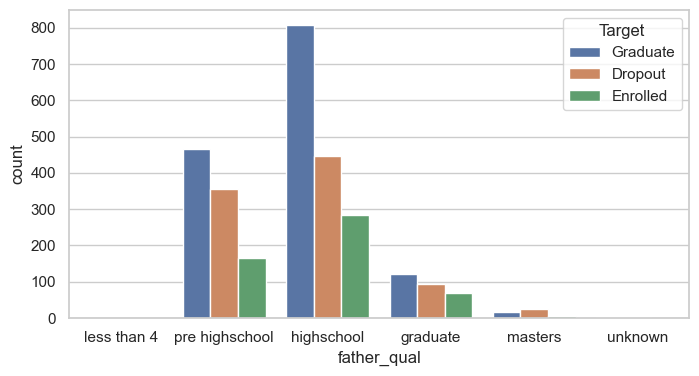

In [81]:
train["father_qual"] = train["Fathers qualification"].map(qual_mapping)
train["mother_qual"] = train["Mothers qualification"].map(qual_mapping)
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='father_qual', order=["less than 4", "pre highschool", "highschool", "graduate", "masters", "unknown"], hue='Target')
plt.show()

### Parents' occupation

In [84]:
occ_mapping = {0: "student",
                1: "managerial",
                2: "professional",
                3: "technical",
                4: "professional",
                5: "service",
                6: "agriculture",
                7: "craftsmen",
                8: "factory",
                9: "elementary",
                10: "armed forces",
                90: "unknown",
                99: "unknown",
                101: "armed forces",
                102: "armed forces",
                103: "armed forces",
                112: "managerial",
                114: "managerial",
                121: "professional",
                122: "professional",
                123: "professional",
                124: "professional",
                131: "technical",
                132: "technical",
                134: "technical",
                135: "technical",
                141: "clerical",
                143: "technical",
                144: "clerical",
                151: "service",
                152: "service",
                153: "service",
                154: "service",
                161: "agriculture",
                163: "agriculture",
                171: "craftsmen",
                172: "craftsmen",
                174: "craftsmen",
                175: "craftsmen",
                181: "factory",
                182: "factory",
                183: "factory",
                192: "elementary",
                193: "elementary",
                194: "elementary",
                195: "elementary"}



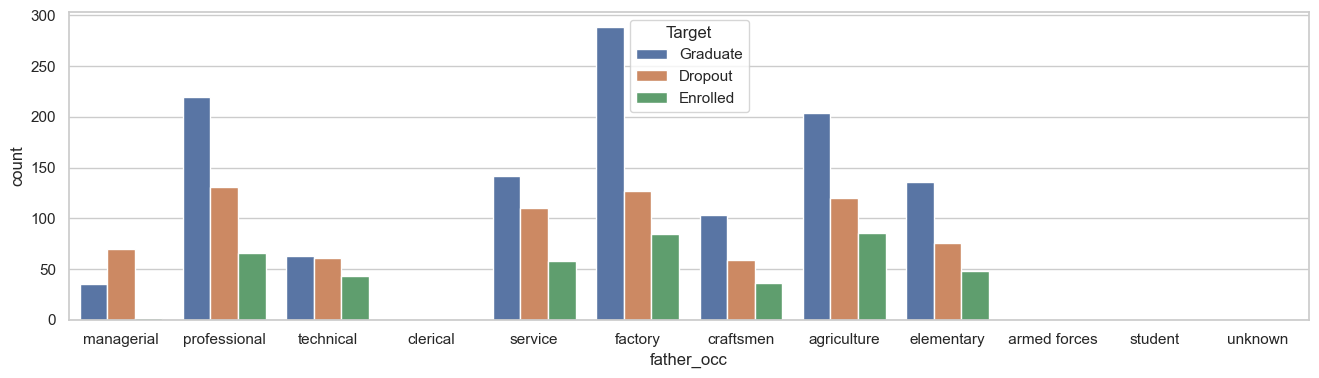

In [85]:
train["father_occ"] = train["Fathers occupation"].map(occ_mapping)
train["mother_occ"] = train["Mothers occupation"].map(occ_mapping)
plt.figure(figsize=(16,4))
sns.countplot(data=train, x='father_occ', order=["managerial", "professional", "technical", "clerical", "service", "factory", "craftsmen", "agriculture", "elementary"," armed forces", "student", "unknown"], hue='Target')
plt.show()

### Previous qualification and grade

In [86]:
prev_qual_mapping = {1:'secondary_school',
                    2: 'graduate',
                    3: 'graduate',
                    4: 'masters', 
                    5: 'doctorate',
                    6: 'unknown',
                    9: 'highschool', 
                    10: 'highschool',
                    12: 'unknown', 
                    14: 'highschool', 
                    15: 'pre-highschool', 
                    19: 'highschool', 
                    38: 'pre-highschool', 
                    39: 'graduate', 
                    40: 'graduate', 
                    42: 'masters',
                    43: 'masters'}



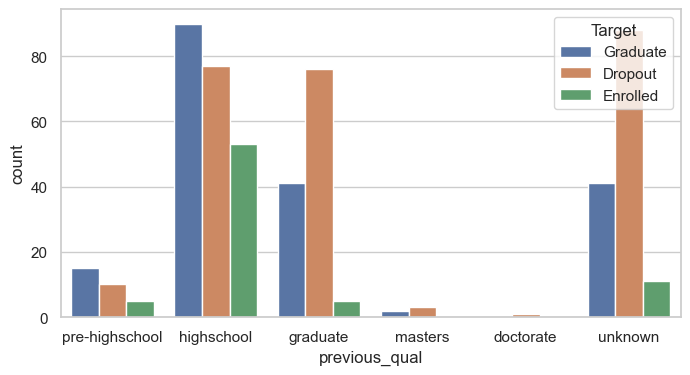

In [87]:
train["previous_qual"] = train["Previous qualification"].map(prev_qual_mapping)
plt.figure(figsize=(8,4))
sns.countplot(data=train, x='previous_qual', order=["pre-highschool", "highschool", "graduate", "masters","doctorate", "unknown"], hue='Target')
plt.show()


<Figure size 1000x800 with 0 Axes>

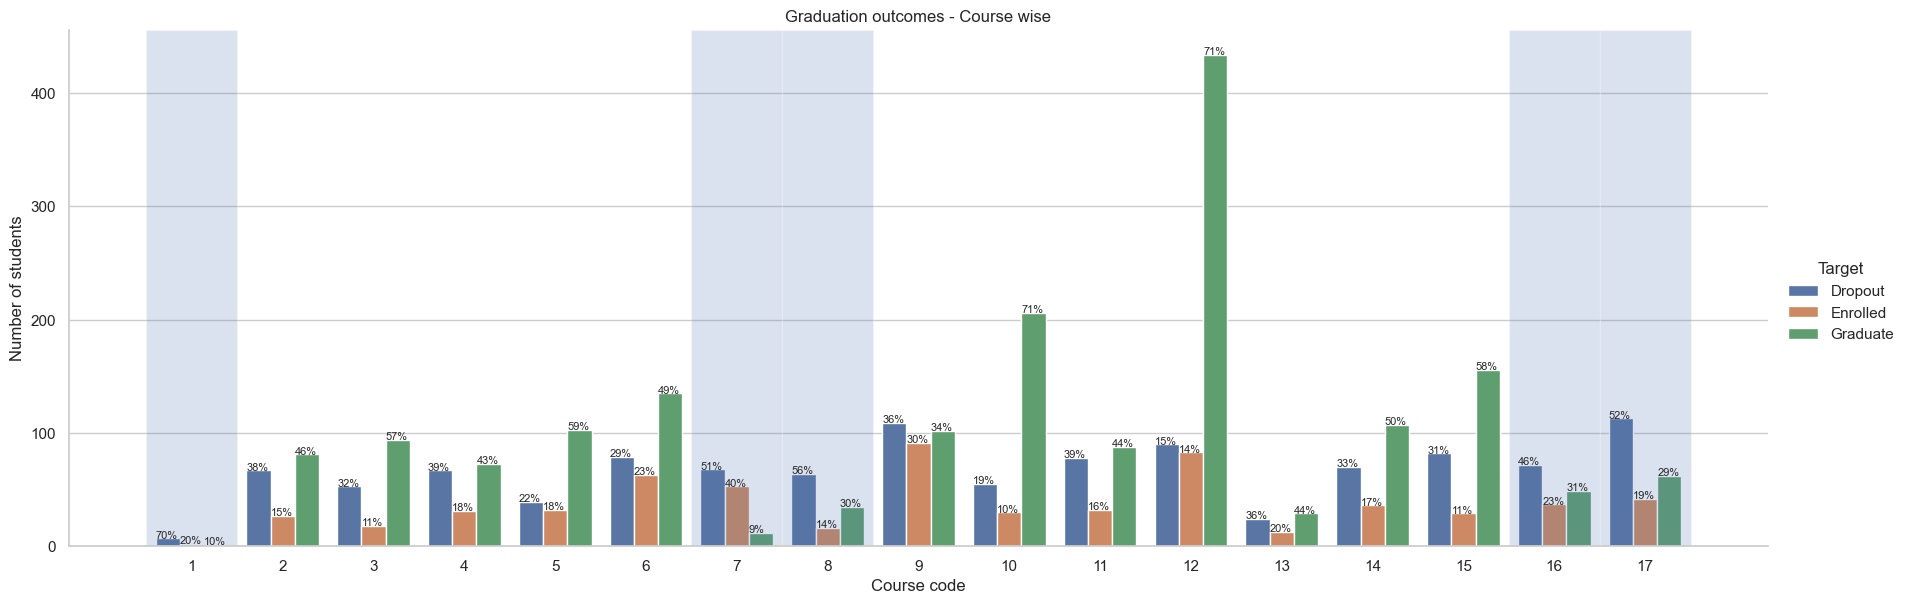

In [88]:
# Prepare the dataset for plotting
course_wise_dropout = train.groupby(["Course", "Target"]).size().reset_index().rename(columns={0:"count"})


#Sorting to get to the same order as groupby so that values can be assigned easily in line2
course_wise_dropout.sort_values(by=["Course", "Target"], inplace=True)
course_wise_dropout["percentage"] = course_wise_dropout.groupby("Course").apply(lambda x: x["count"]/x["count"].sum()).values

#sorting in the plotting order
course_wise_dropout.sort_values(by=["Target", "Course"], inplace=True)

# Plotting
plt.figure(figsize=(10,8))
fig = sns.catplot(data=course_wise_dropout, x="Course", y = "count", kind='bar', hue="Target", height= 6, aspect=3)
plt.xlabel("Course code")
plt.ylabel("Number of students")

# Annotation
for i, bar in enumerate(fig.ax.patches):
    percent = f"{course_wise_dropout.iloc[i, 3]*100:.0f}%"
    xy = (bar.get_x(), bar.get_height())
    fig.ax.annotate(percent, xy, fontsize=8)

#Highlighting
for x in [0, 6, 7, 15, 16]:
    fig.ax.axvspan(x-0.5, x + 0.5, alpha = 0.2) 

plt.title("Graduation outcomes - Course wise")
plt.show()

The following courses have a much higher dropout rate(45% or above) than the university average

33 - 70% - Biofuel production technologies

9119 - 51% - Informatics engineering

9130 - 56% - Equinculture

9853 - 46% - Basic Education

9991 - 45% - Management(evening attendance)

### Hypothesis testing

In [ ]:
#1. Do males have a higher chance of being a droput?
dropout_rates = pd.DataFrame()
dropout_rates["Gender"] = ["Female", "Male"]
dropout_rates["Dropout rates"] = train[train['Target'] == 'Dropout']['Gender'].value_counts()/ train["Gender"].value_counts()

plt.figure(figsize=(4, 5))
fig = sns.barplot(data=dropout_rates, x="Gender", y="Dropout rates")

for i,p in enumerate(fig.patches):
    xy = (p.get_x()+0.3, p.get_height()+0.01)
    fig.annotate(f"{dropout_rates.iloc[i, 1]:.2f}", xy)

plt.title("Dropout rate - Gender wise")
plt.show()


## Drop out rates among male students are significantly different from female students. The rate for male students are almost double as that of female students.

In [ ]:
##2. Are the older students at a higher risk of dropping out?

In [89]:
# Create a binary column for age group (above 30 or below 30)
df['Age Group'] = df['Age at enrollment'].apply(lambda x: 'Above 30' if x > 30 else 'Below 30')

# Create a contingency table
contingency_table = pd.crosstab(df['Age Group'], df['Target'])

# Perform the chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Check the significance level (e.g., 0.05) and make a decision
alpha = 0.05
if p < alpha:
    print("There is a significant association between age group and dropout status.")
else:
    print("There is no significant association between age group and dropout status.")

Chi-square statistic: 165.23501832801566
P-value: 1.3172604770142044e-36
There is a significant association between age group and dropout status.


In [90]:
contingency_table

Target,Dropout,Enrolled,Graduate
Age Group,,,
Above 30,355,84,223
Below 30,1066,710,1986


In [ ]:
qual_mapping = {1: "highschool",
                38:"pre highschool",
                37:"pre highschool",
                19:"highschool",
                11:"pre highschool",
                3:"graduate",
                2:"graduate",
                34:"unknown",
                4:"masters",
                27:"pre highschool", 
                12:"unknown",
                39:"graduate",
                42:"masters",
                5:"masters",
                40:"graduate",
                6:"unknown",
                36:"less than 4",
                44:"masters", 
                41:"graduate", 
                29:"pre highschool", 
                30:"pre highschool",  
                9:"highschool", 
                10:"highschool", 
                35:"less than 4", 
                14:"highschool", 
                43:"masters", 
                26:"pre highschool", 
                25:"pre highschool", 
                18:"graduate", 
                22:"masters", 
                31:"graduate", 
                20:"highschool"}

In [ ]:
train["father_qual"] = train["Fathers qualification"].map(qual_mapping)
train["mother_qual"] = train["Mothers qualification"].map(qual_mapping)